In [4]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score  # 导入Silhouette Score

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
df = pd.read_excel(r'./Sheet12.xlsx', sheet_name=0)
df.fillna(0, inplace=True)
df = df.drop(columns=['文物编号','纹饰','颜色','表面风化'])

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
x = df[['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钾(K2O)','氧化钙(CaO)','氧化镁(MgO)',\
        '氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)'	,'氧化钡(BaO)'	,'五氧化二磷(P2O5)'	,'氧化锶(SrO)',	'氧化锡(SnO2)','二氧化硫(SO2)']]
y = df['类型']
# 将类别标签转换为字符串类型
y = y.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# 用决策树进行预测
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
print("预测的准确率为：", dec.score(x_test, y_test))

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import pydotplus
from IPython.display import Image

# 导出决策树为Graphviz格式
export_graphviz(
    dec,
    out_file="tree.dot",
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True,
    fontname="SimHei",  # 添加此行，使用SimHei字体
)

# 将Graphviz文件转换为图形或查看器中的可视化结果
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dec, out_file=None, feature_names=x.columns, class_names=y.astype(str).unique(), filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

df1 = df[df["类型"]==1]
df2 = df[df["类型"]==2]
df1 = df1.drop(columns='类型')
df2 = df2.drop(columns='类型')
sample_label1 =df1['文物采样点'].values
sample_label2 =df2['文物采样点'].values
df1 = df1.drop(columns='文物采样点')
df2 = df2.drop(columns='文物采样点')
sample_label1


预测的准确率为： 1.0


array(['01', '03部位1', '03部位2', '04', '05', '06部位1', '06部位2', '07', '09',
       '10', '12', '13', '14', '15', '16', '17', '18', '21', '22', '27'],
      dtype=object)

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [ 2.          4.          4.75721557  2.        ]
 [12.         14.          5.09877436  2.        ]
 [22.         23.          5.79622291  6.        ]
 [11.         26.          5.86352283  3.        ]
 [27.         29.          9.37096473  5.        ]
 [ 1.         16.          9.46770828  2.        ]
 [ 5.          6.         10.28721537  2.        ]
 [25.         30.         11.54634599  7.        ]
 [17.         31.         13.53948177  3.        ]
 [32.         33.         15.77072192  9.        ]
 [24.         35.         18.68833104 11.        ]
 [28.         34.         27.9937751   9.        ]
 [36.         37.         88.95728081 20.        ]]


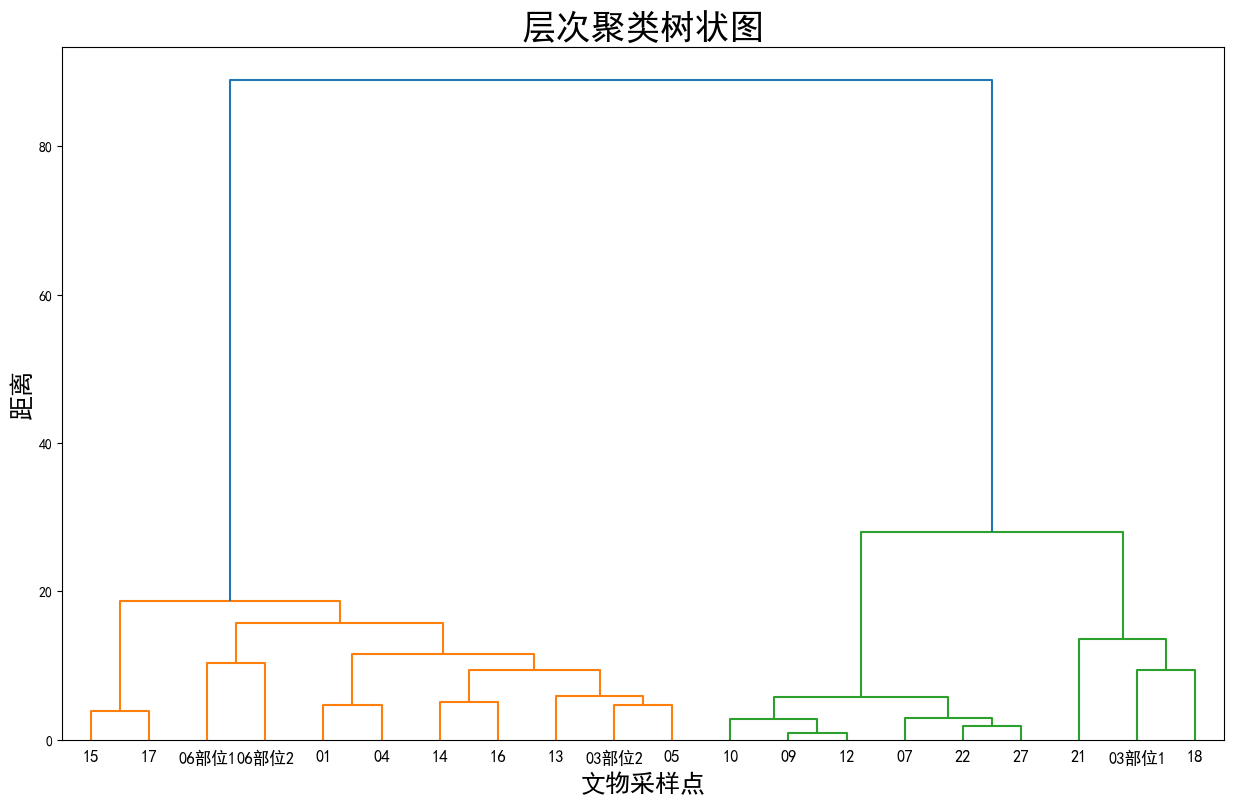

For n_clusters=2, the Silhouette Score is 0.6383188652432962
For n_clusters=3, the Silhouette Score is 0.5474450183201462
For n_clusters=4, the Silhouette Score is 0.45256833593217854
For n_clusters=5, the Silhouette Score is 0.4595403007725631
For n_clusters=6, the Silhouette Score is 0.4391494670545679
For n_clusters=7, the Silhouette Score is 0.3885712006543997
For n_clusters=8, the Silhouette Score is 0.3886759473492634
For n_clusters=9, the Silhouette Score is 0.3446396573710904
For n_clusters=10, the Silhouette Score is 0.3635753860695611


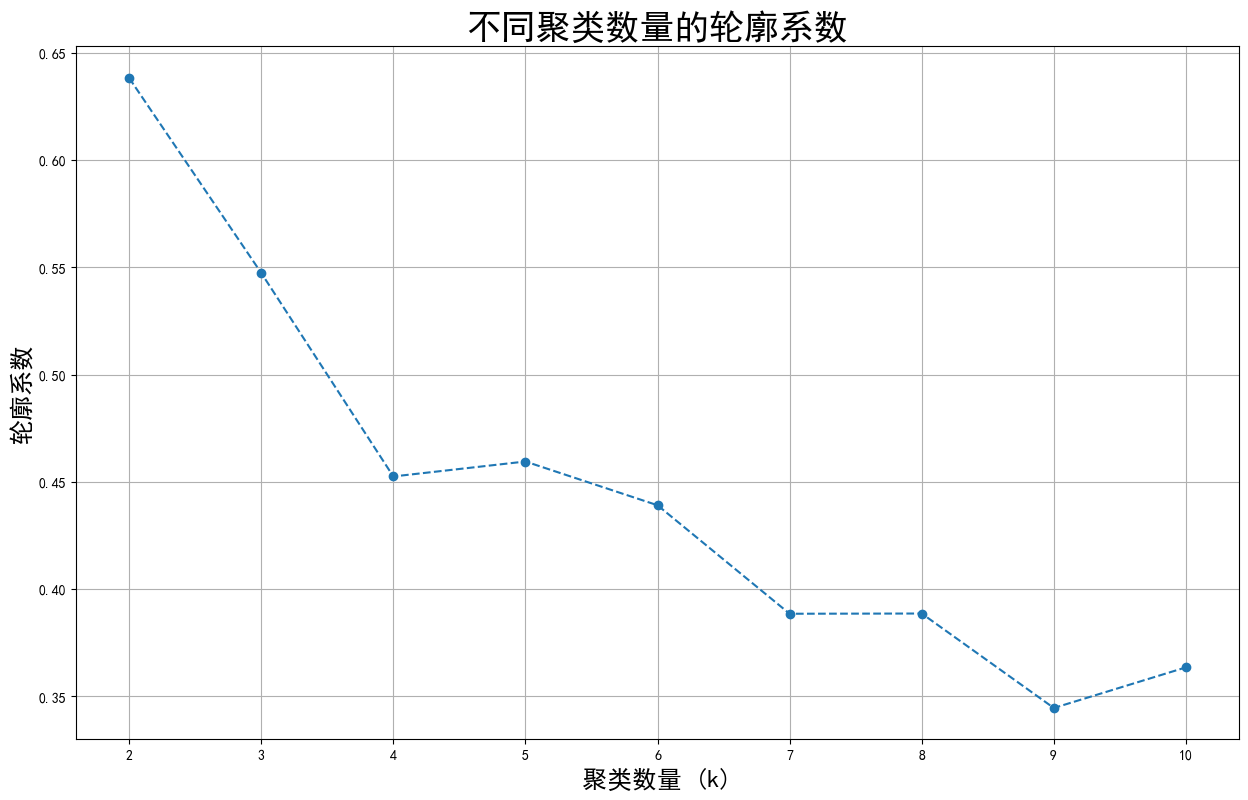

[[ 8.         10.          0.50685304  2.        ]
 [ 9.         20.          1.2672937   3.        ]
 [18.         19.          1.75533473  2.        ]
 [ 3.          4.          2.09735548  2.        ]
 [ 7.         21.          2.8515902   4.        ]
 [22.         24.          3.27934445  6.        ]
 [13.         15.          3.76547474  2.        ]
 [ 0.         23.          4.09533474  3.        ]
 [12.         14.          4.31895821  2.        ]
 [ 1.         26.          5.36120633  3.        ]
 [ 2.         11.          5.38817223  2.        ]
 [27.         30.          5.80760651  5.        ]
 [16.         29.          5.99690476  4.        ]
 [ 5.          6.          6.66042041  2.        ]
 [17.         25.          8.99262714  7.        ]
 [28.         31.          9.11223259  7.        ]
 [32.         34.         15.35298025 11.        ]
 [33.         35.         15.76890511  9.        ]
 [36.         37.         34.73035982 20.        ]]
For n_clusters=2, the Silhouet

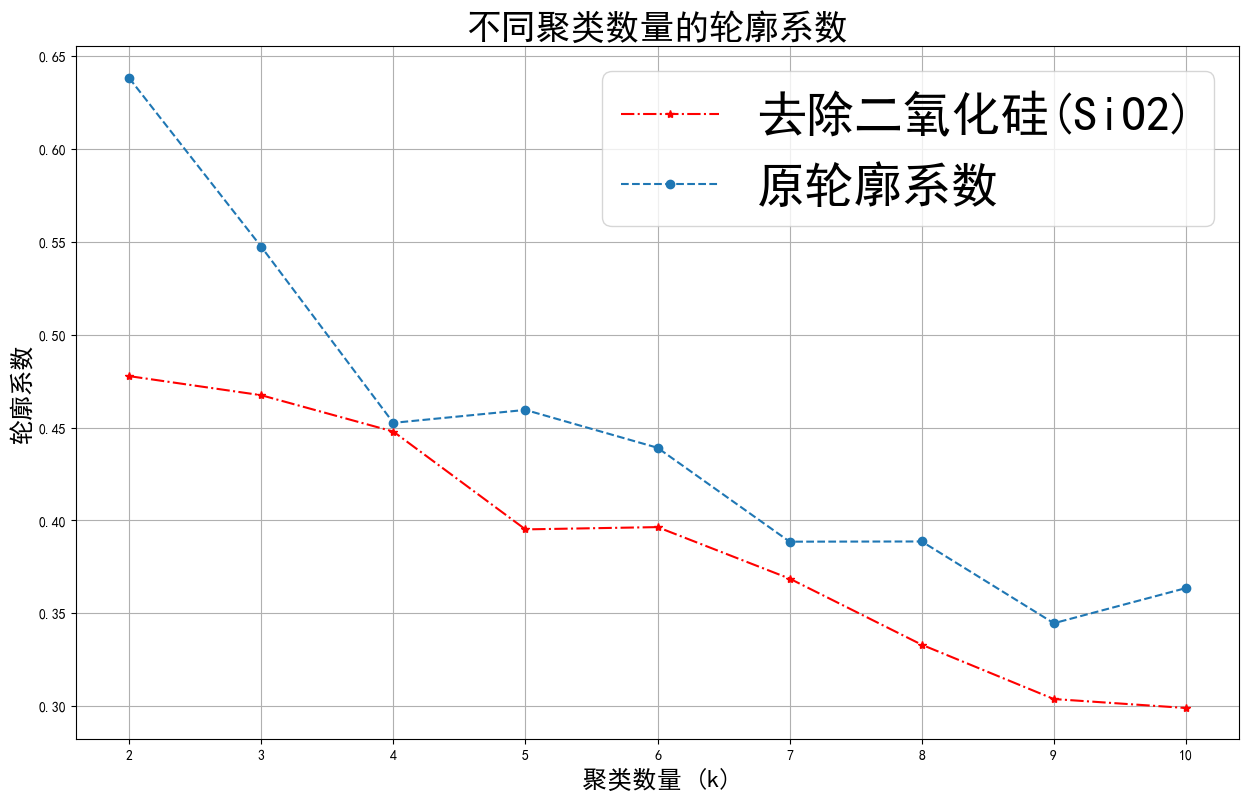

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.78633068  2.        ]
 [ 4.         11.          4.28776165  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [12.         14.          4.9354939   2.        ]
 [ 2.         25.          5.26507043  3.        ]
 [22.         23.          5.79622291  6.        ]
 [27.         28.          8.95286286  5.        ]
 [ 1.         16.          9.46770828  2.        ]
 [ 5.          6.         10.28721537  2.        ]
 [26.         30.         11.19682519  7.        ]
 [17.         31.         13.53948177  3.        ]
 [32.         33.         15.63008129  9.        ]
 [24.         35.         18.42183978 11.        ]
 [29.         34.         27.9937751   9.        ]
 [36.         37.         88.87130322 20.        ]]
For n_clusters=2, the Silhouet

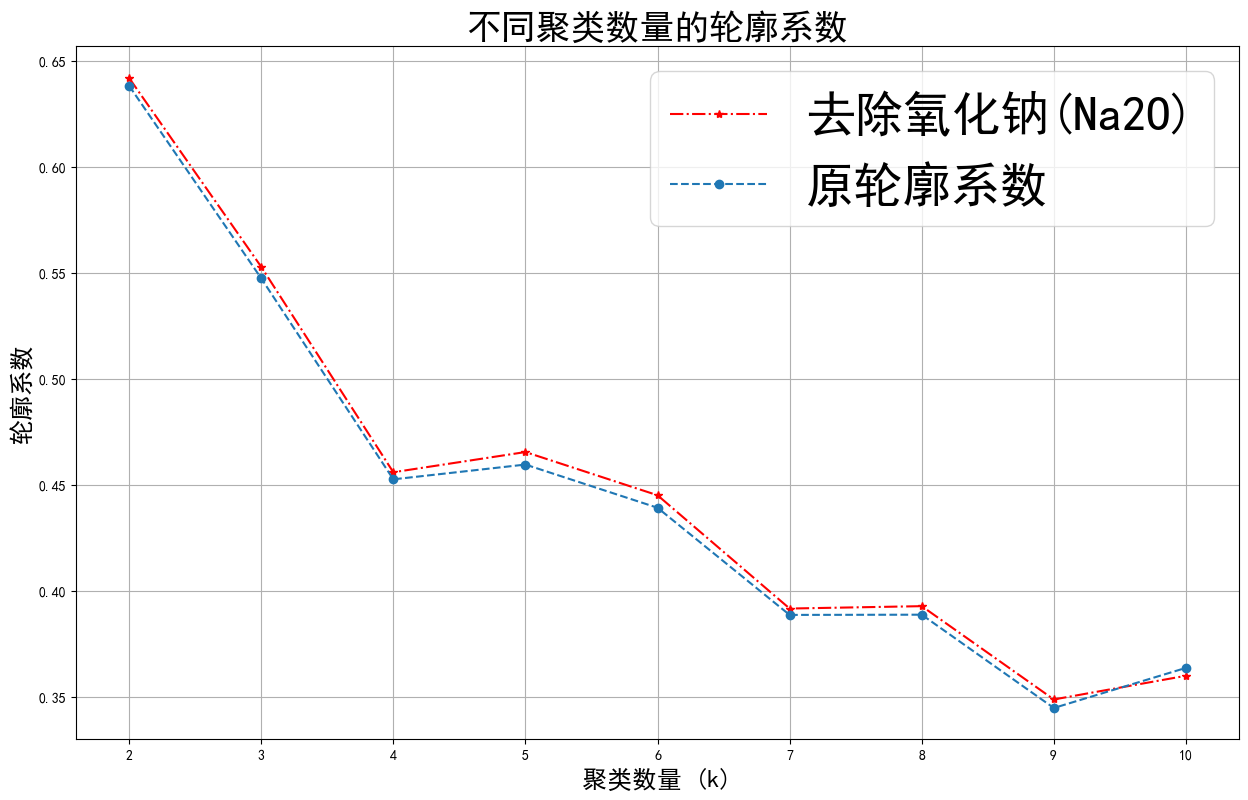

[[ 8.         10.          0.78319857  2.        ]
 [18.         19.          1.63416645  2.        ]
 [ 9.         20.          2.74793256  3.        ]
 [ 7.         21.          2.92011986  3.        ]
 [ 3.         14.          3.47286625  2.        ]
 [13.         15.          3.53998588  2.        ]
 [ 2.          4.          4.5403414   2.        ]
 [22.         23.          5.70439012  6.        ]
 [11.         26.          5.77682439  3.        ]
 [12.         24.          6.12844733  3.        ]
 [16.         17.          8.17107704  2.        ]
 [ 0.         29.          8.55893296  4.        ]
 [ 6.         28.          8.56119151  4.        ]
 [ 1.         27.          9.67094175  7.        ]
 [31.         32.         12.6433441   8.        ]
 [ 5.         34.         13.46567096  9.        ]
 [25.         35.         17.03939022 11.        ]
 [30.         33.         27.06268869  9.        ]
 [36.         37.         85.26505265 20.        ]]
For n_clusters=2, the Silhouet

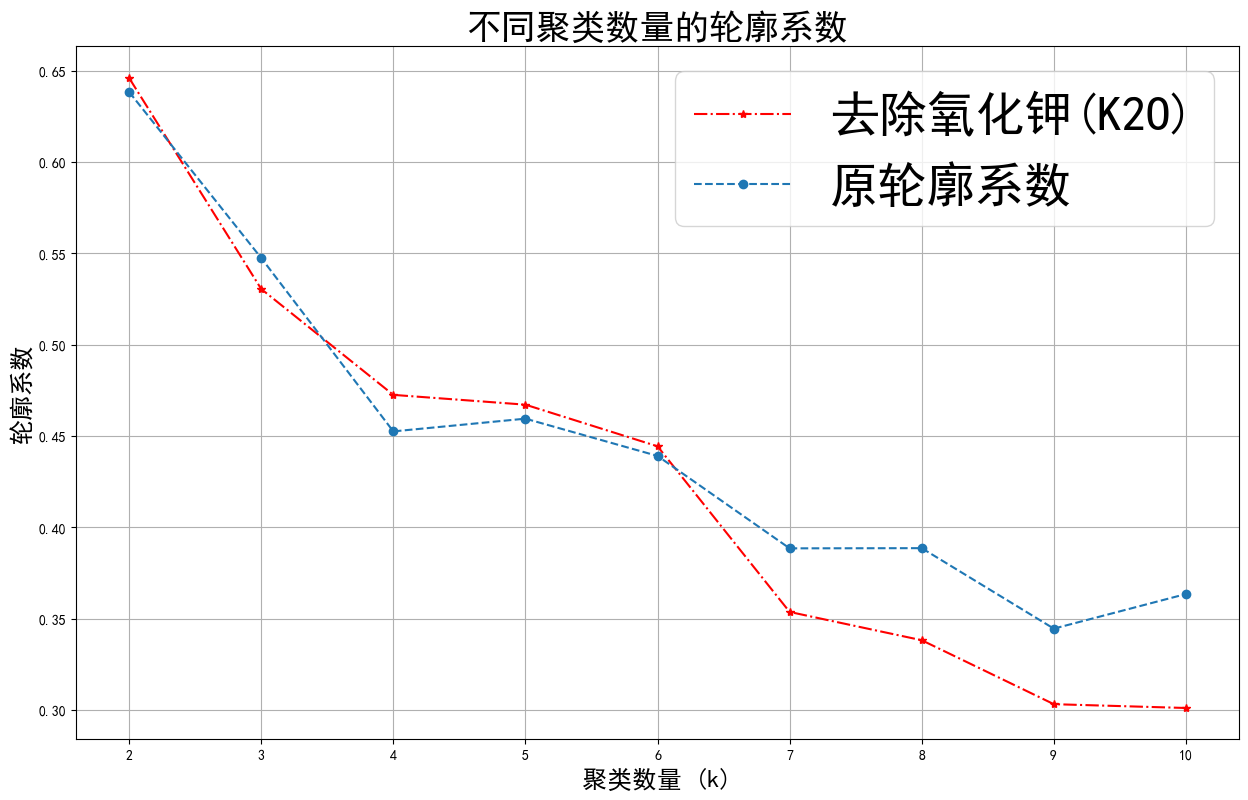

[[ 8.         10.          0.88306285  2.        ]
 [18.         19.          1.64307638  2.        ]
 [ 9.         20.          2.69966665  3.        ]
 [ 7.         21.          2.93923459  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 2.          4.          4.52113924  2.        ]
 [ 0.          3.          4.67812997  2.        ]
 [12.         14.          5.09861746  2.        ]
 [11.         25.          5.34385317  3.        ]
 [22.         23.          5.66551557  6.        ]
 [ 5.         26.          8.56835457  3.        ]
 [ 1.         16.          9.25188629  2.        ]
 [27.         28.          9.25630992  5.        ]
 [ 6.         32.         11.27975739  6.        ]
 [17.         31.         12.84581125  3.        ]
 [30.         33.         13.65499135  9.        ]
 [24.         35.         14.72190233 11.        ]
 [29.         34.         27.85935829  9.        ]
 [36.         37.         88.11573372 20.        ]]
For n_clusters=2, the Silhouet

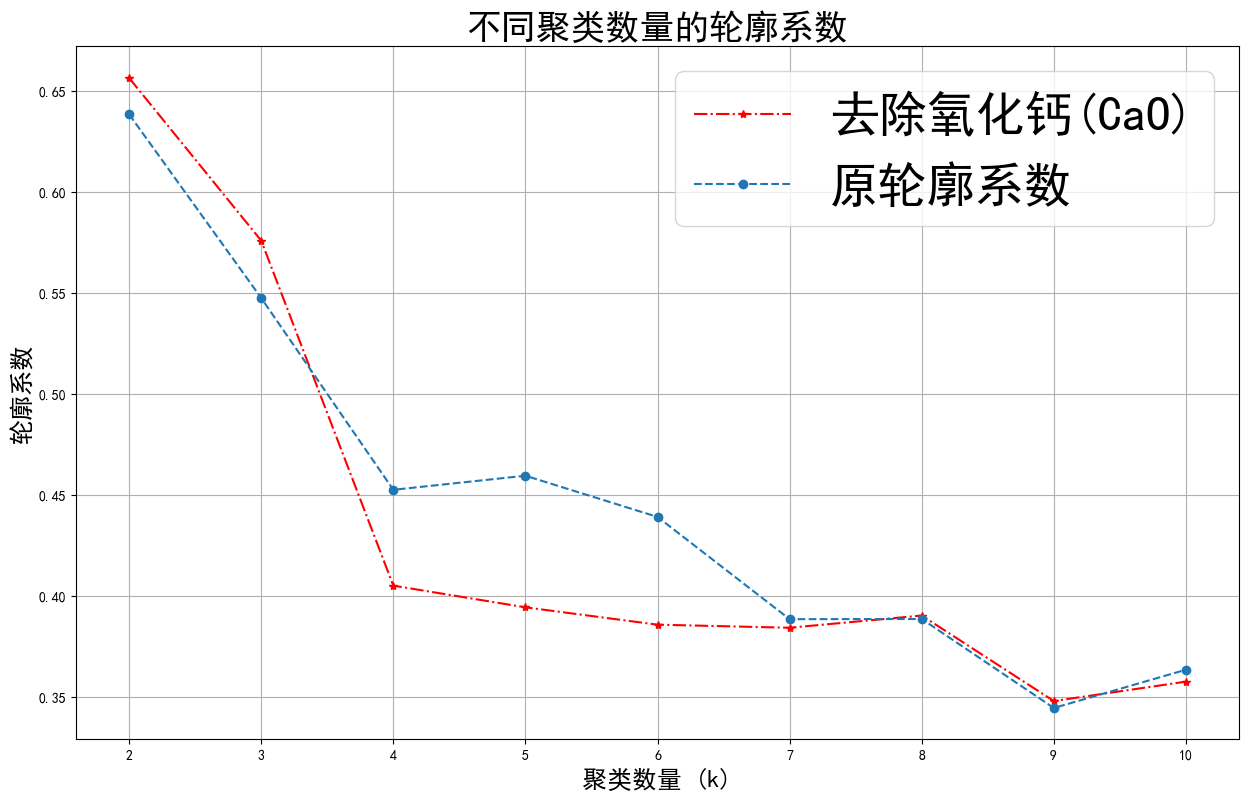

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79111697  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.87149787  3.        ]
 [13.         15.          3.93643239  2.        ]
 [ 0.          3.          4.69561498  2.        ]
 [ 2.          4.          4.71121004  2.        ]
 [12.         14.          5.09685197  2.        ]
 [11.         26.          5.62281958  3.        ]
 [22.         23.          5.7560461   6.        ]
 [ 1.         16.          9.34326495  2.        ]
 [27.         28.          9.35341756  5.        ]
 [ 5.          6.         10.28417717  2.        ]
 [25.         31.         11.52623442  7.        ]
 [17.         30.         13.52928429  3.        ]
 [32.         33.         15.68557476  9.        ]
 [24.         35.         18.68488643 11.        ]
 [29.         34.         27.95671376  9.        ]
 [36.         37.         88.93299414 20.        ]]
For n_clusters=2, the Silhouet

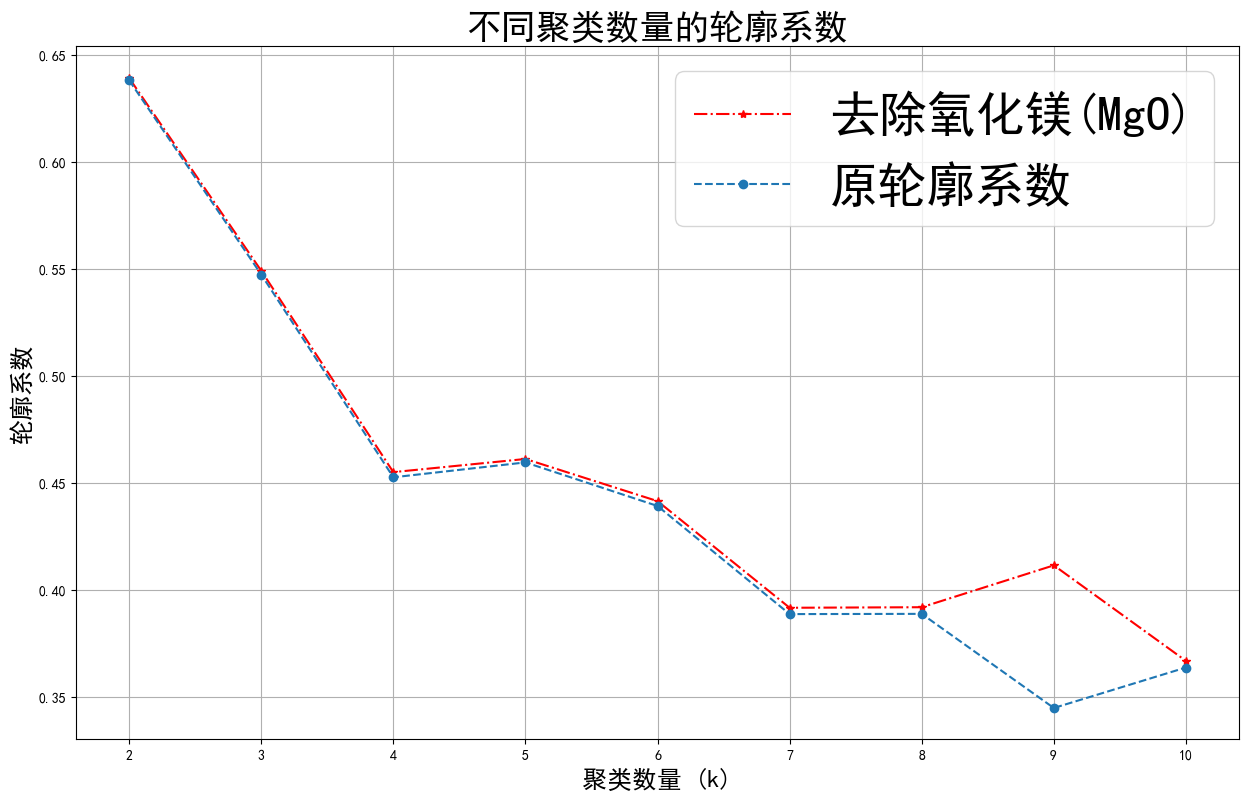

[[ 8.         10.          0.87761039  2.        ]
 [18.         19.          1.49599465  2.        ]
 [13.         15.          2.36683333  2.        ]
 [ 9.         20.          2.66867008  3.        ]
 [ 7.         21.          2.70347924  3.        ]
 [ 0.          3.          4.02800199  2.        ]
 [12.         14.          4.08595154  2.        ]
 [ 2.          4.          4.31637579  2.        ]
 [23.         24.          5.20988164  6.        ]
 [11.         27.          5.85036466  3.        ]
 [ 6.         29.          8.97292223  4.        ]
 [ 5.         25.          9.28365589  3.        ]
 [ 1.         16.          9.41368153  2.        ]
 [26.         30.         11.07208201  6.        ]
 [17.         32.         13.19317753  3.        ]
 [22.         31.         13.93397837  5.        ]
 [33.         35.         16.25104215 11.        ]
 [28.         34.         27.54241698  9.        ]
 [36.         37.         88.25933336 20.        ]]
For n_clusters=2, the Silhouet

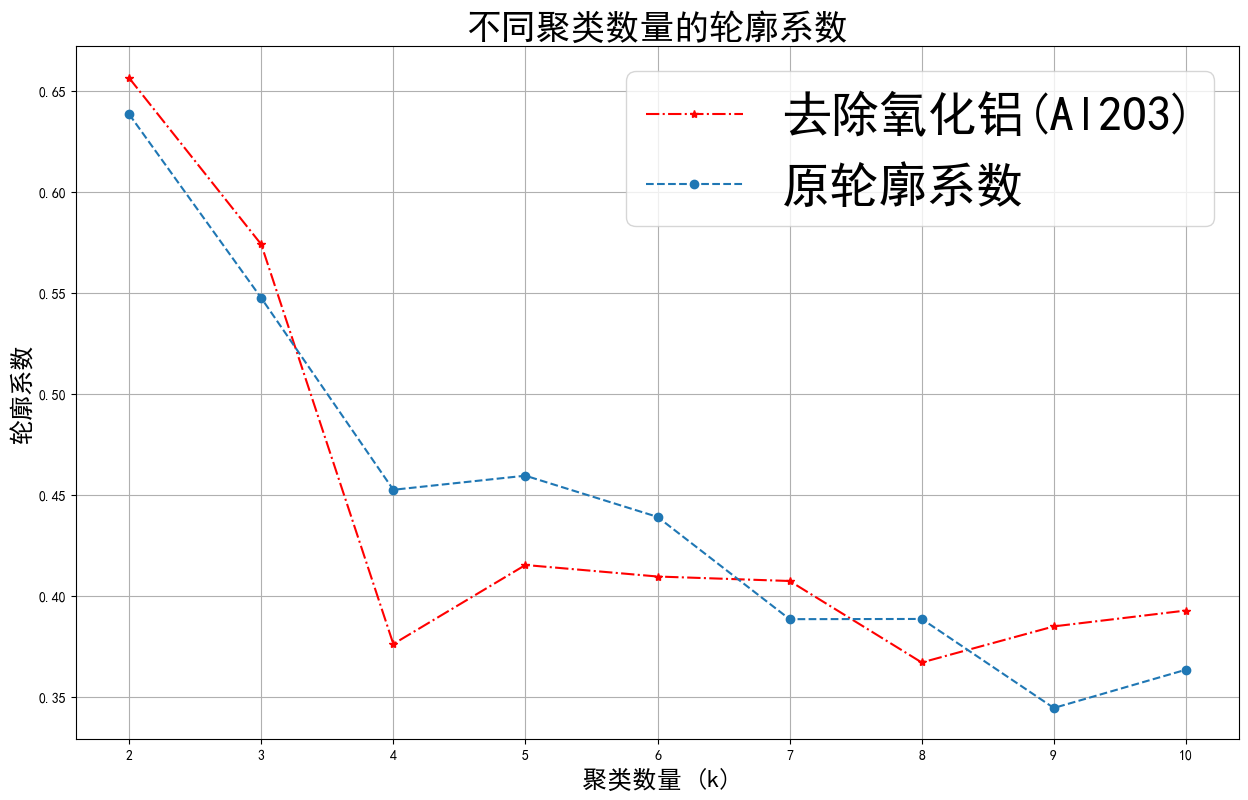

[[ 8.         10.          0.88820043  2.        ]
 [18.         19.          1.78762412  2.        ]
 [ 9.         20.          2.75093318  3.        ]
 [ 7.         21.          2.94871724  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 2.          4.          4.73492344  2.        ]
 [ 0.          3.          4.73524023  2.        ]
 [12.         14.          5.09814672  2.        ]
 [22.         23.          5.7955759   6.        ]
 [11.         25.          5.83616027  3.        ]
 [27.         29.          8.79193229  5.        ]
 [ 1.         16.          9.46770828  2.        ]
 [ 5.          6.          9.61791557  2.        ]
 [26.         30.         11.5421564   7.        ]
 [17.         31.         13.26002891  3.        ]
 [32.         33.         15.16890339  9.        ]
 [24.         35.         18.54606822 11.        ]
 [28.         34.         27.97407629  9.        ]
 [36.         37.         88.80732651 20.        ]]
For n_clusters=2, the Silhouet

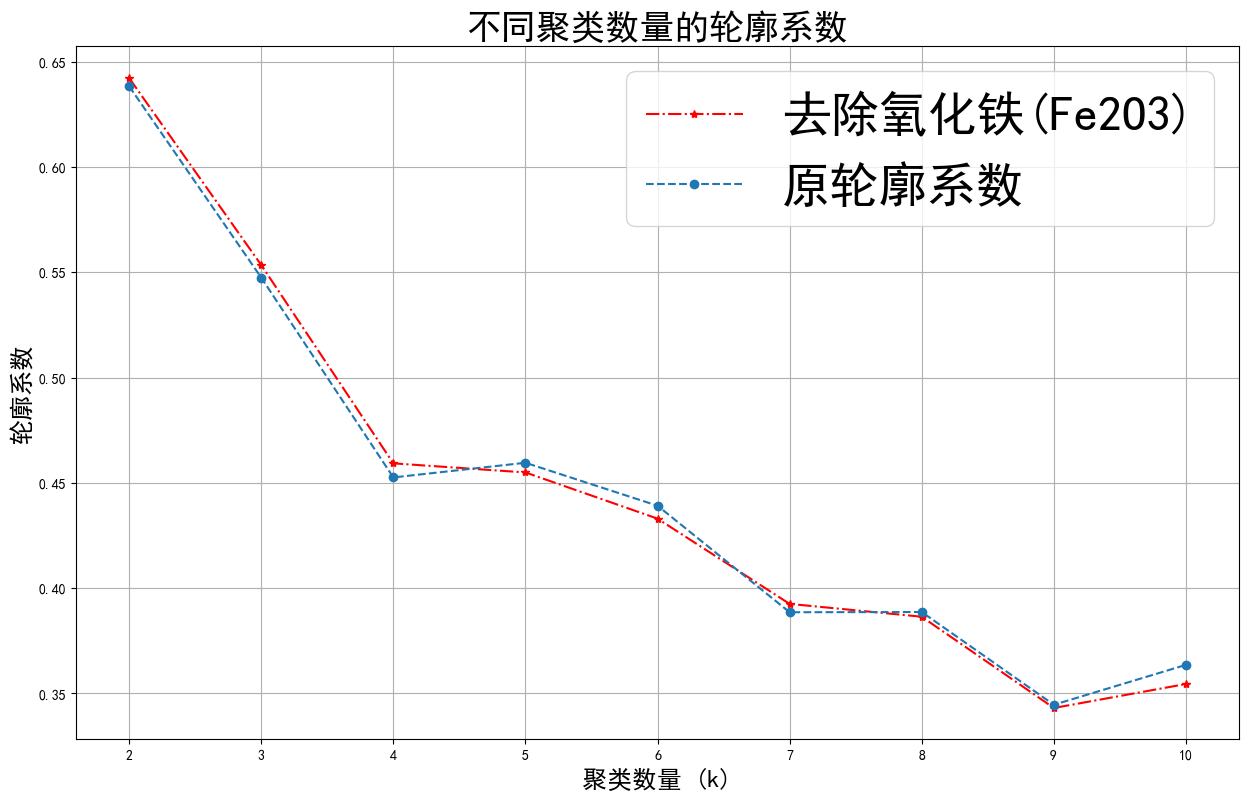

[[ 7.         19.          0.81295756  2.        ]
 [ 8.         10.          0.88306285  2.        ]
 [18.         20.          1.96537528  3.        ]
 [ 9.         21.          2.60771931  3.        ]
 [13.         15.          3.93502224  2.        ]
 [ 2.          4.          4.39530431  2.        ]
 [ 0.          3.          4.43495209  2.        ]
 [12.         14.          5.06334869  2.        ]
 [22.         23.          5.74817362  6.        ]
 [11.         25.          5.82902793  3.        ]
 [27.         29.          7.53830706  5.        ]
 [ 1.         16.          9.4355233   2.        ]
 [ 5.          6.         10.28192103  2.        ]
 [26.         30.         11.5451333   7.        ]
 [17.         31.         13.12179231  3.        ]
 [32.         33.         15.73406289  9.        ]
 [24.         35.         18.45454574 11.        ]
 [28.         34.         27.99067404  9.        ]
 [36.         37.         88.89816982 20.        ]]
For n_clusters=2, the Silhouet

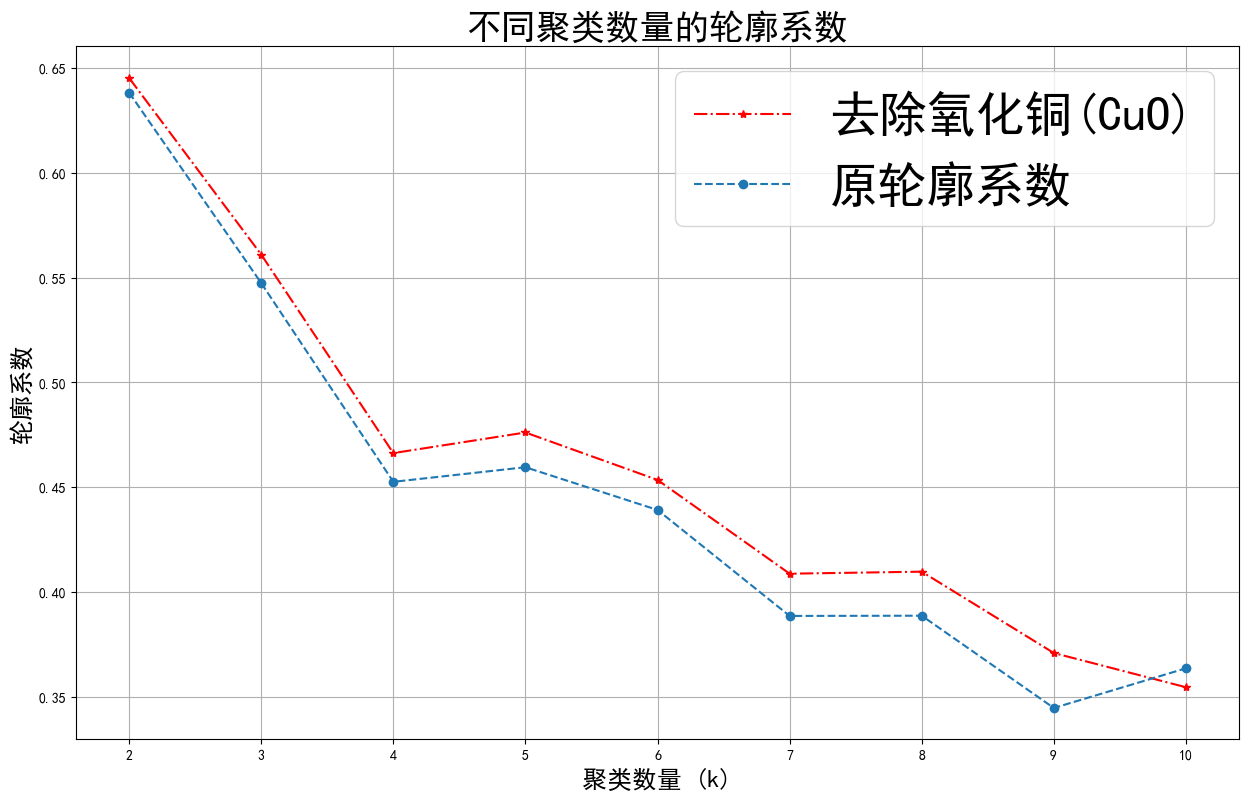

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 2.          4.          4.54345683  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [12.         14.          4.87005133  2.        ]
 [22.         23.          5.79622291  6.        ]
 [11.         25.          5.80673747  3.        ]
 [27.         29.          9.35096359  5.        ]
 [ 1.         16.          9.46440701  2.        ]
 [ 5.          6.         10.28612172  2.        ]
 [26.         30.         11.49744729  7.        ]
 [17.         31.         13.50173075  3.        ]
 [32.         33.         15.76775004  9.        ]
 [24.         35.         18.68409262 11.        ]
 [28.         34.         27.9813688   9.        ]
 [36.         37.         88.95430865 20.        ]]
For n_clusters=2, the Silhouet

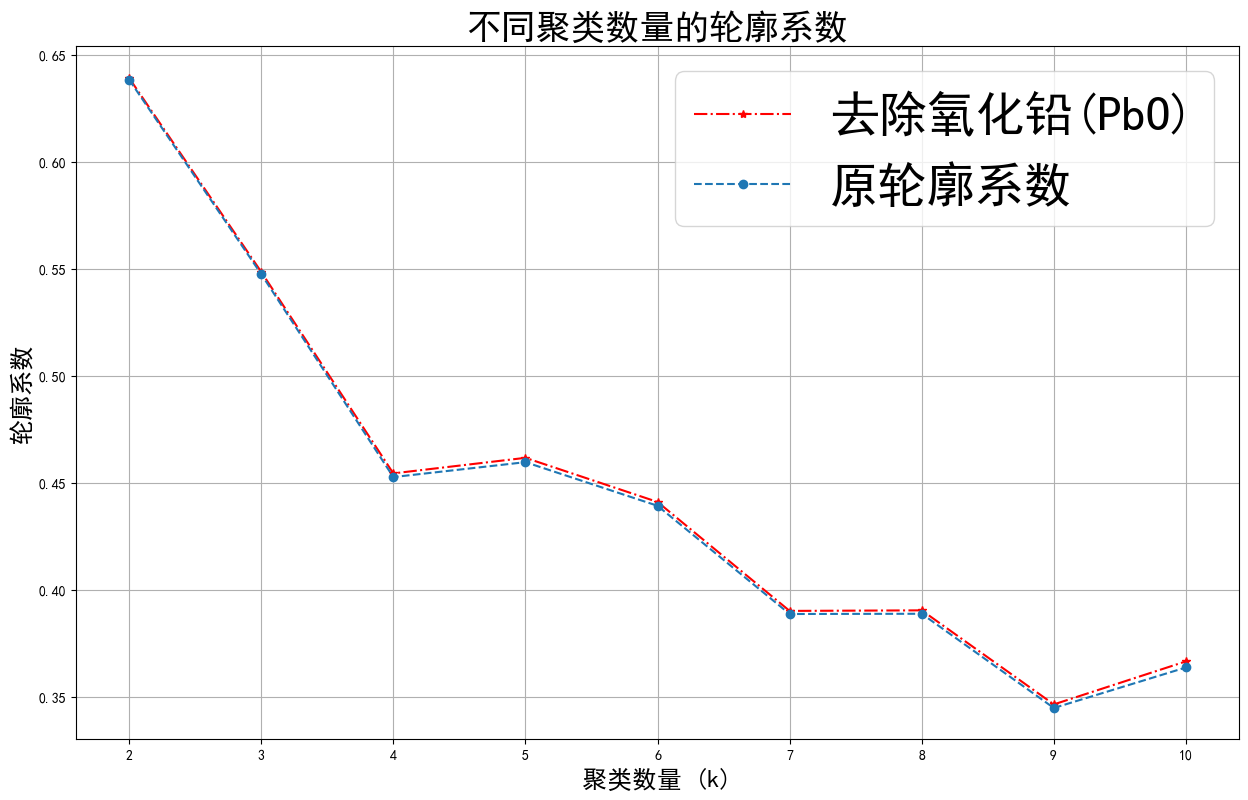

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [ 2.          4.          3.80151286  2.        ]
 [13.         15.          3.94010152  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [12.         14.          5.09877436  2.        ]
 [11.         24.          5.62622135  3.        ]
 [22.         23.          5.79622291  6.        ]
 [27.         28.          9.25385073  5.        ]
 [ 1.         16.          9.46770828  2.        ]
 [ 5.          6.         10.27904178  2.        ]
 [26.         30.         11.50579394  7.        ]
 [17.         31.         13.34702339  3.        ]
 [32.         33.         15.71267525  9.        ]
 [25.         35.         18.65896529 11.        ]
 [29.         34.         27.96295049  9.        ]
 [36.         37.         88.95366961 20.        ]]
For n_clusters=2, the Silhouet

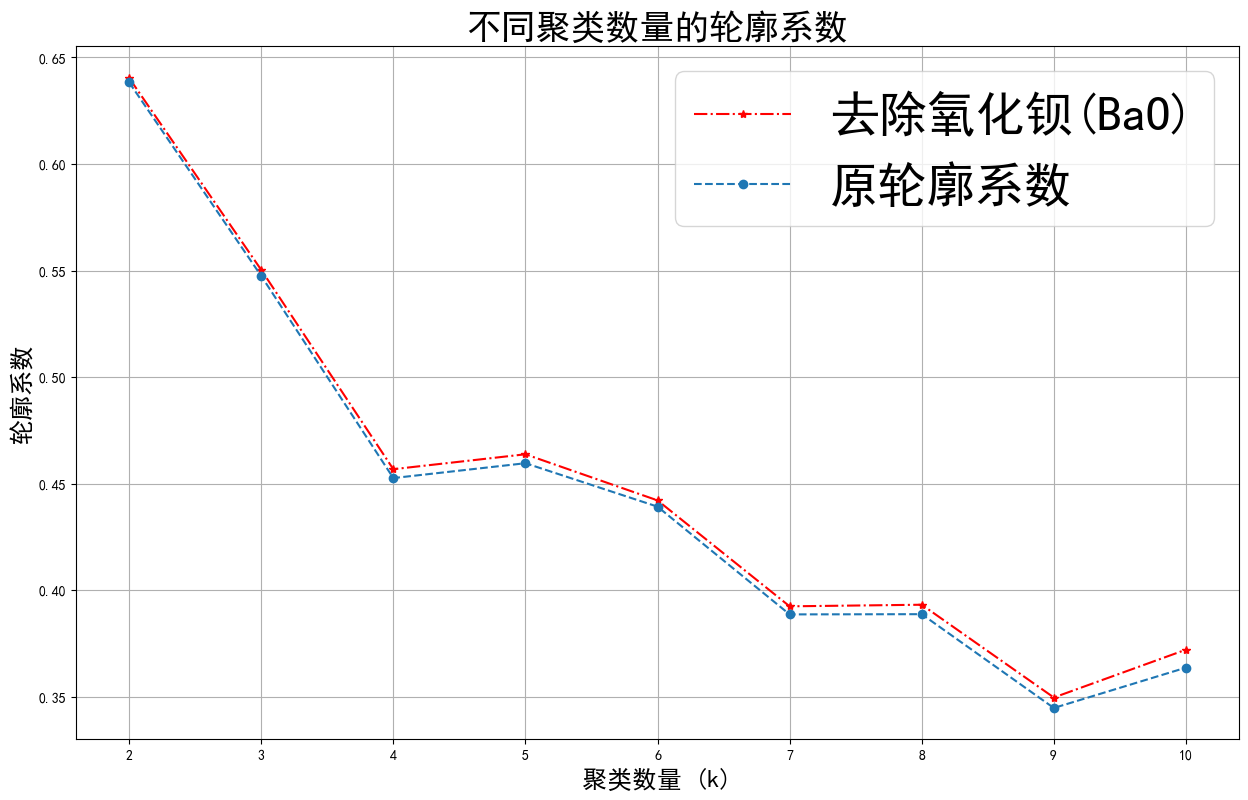

[[ 8.         10.          0.86590993  2.        ]
 [18.         19.          1.78762412  2.        ]
 [ 9.         20.          2.73623829  3.        ]
 [ 7.         21.          2.92725127  3.        ]
 [13.         15.          3.93928928  2.        ]
 [ 0.          3.          4.73080331  2.        ]
 [ 2.          4.          4.75115775  2.        ]
 [12.         14.          5.09626334  2.        ]
 [22.         23.          5.78291161  6.        ]
 [11.         26.          5.84045375  3.        ]
 [ 6.         29.          9.05273439  4.        ]
 [ 1.         16.          9.44179538  2.        ]
 [25.         27.         10.16569722  4.        ]
 [30.         32.         12.4500743   8.        ]
 [17.         31.         13.53908293  3.        ]
 [ 5.         33.         13.86326821  9.        ]
 [24.         35.         18.53899695 11.        ]
 [28.         34.         27.95247832  9.        ]
 [36.         37.         88.92572164 20.        ]]
For n_clusters=2, the Silhouet

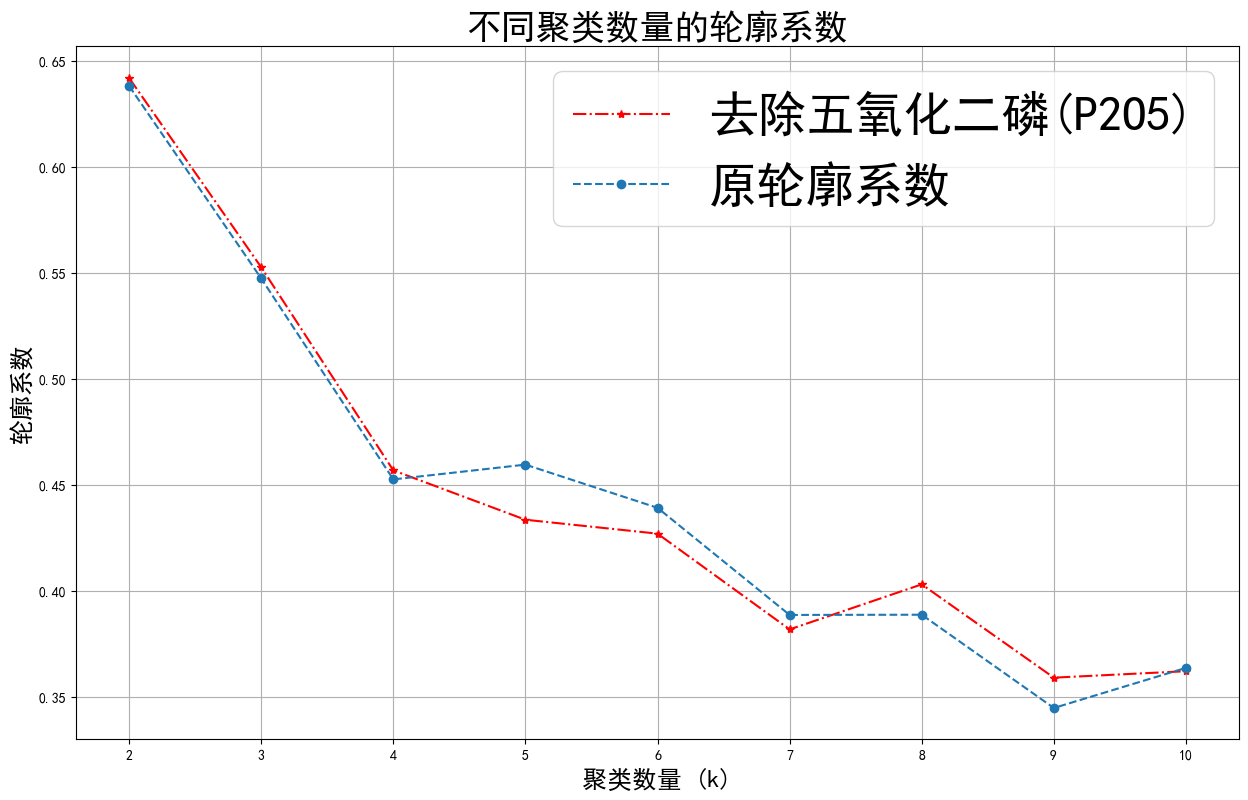

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [ 2.          4.          4.7570474   2.        ]
 [12.         14.          5.09861746  2.        ]
 [22.         23.          5.79622291  6.        ]
 [11.         26.          5.86279512  3.        ]
 [27.         29.          9.37082245  5.        ]
 [ 1.         16.          9.4674495   2.        ]
 [ 5.          6.         10.28721051  2.        ]
 [25.         30.         11.54614803  7.        ]
 [17.         31.         13.53942145  3.        ]
 [32.         33.         15.7699851   9.        ]
 [24.         35.         18.68813117 11.        ]
 [28.         34.         27.9937362   9.        ]
 [36.         37.         88.95722625 20.        ]]
For n_clusters=2, the Silhouet

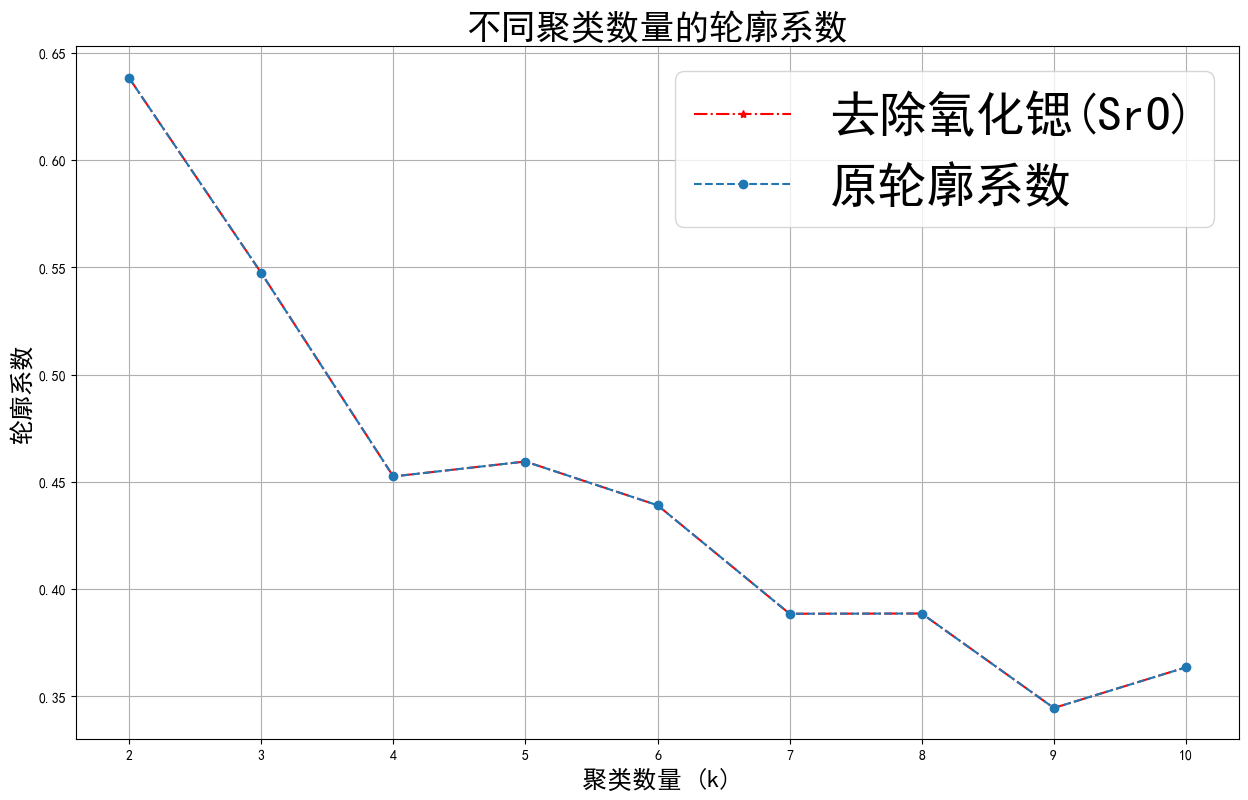

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 0.          3.          4.74604045  2.        ]
 [ 2.          4.          4.75721557  2.        ]
 [12.         14.          5.09877436  2.        ]
 [22.         23.          5.79622291  6.        ]
 [11.         26.          5.86352283  3.        ]
 [ 1.         16.          9.16885489  2.        ]
 [27.         29.          9.37096473  5.        ]
 [ 5.          6.         10.28721537  2.        ]
 [25.         31.         11.54634599  7.        ]
 [17.         30.         13.47074732  3.        ]
 [32.         33.         15.77072192  9.        ]
 [24.         35.         18.68833104 11.        ]
 [28.         34.         27.94952713  9.        ]
 [36.         37.         88.95345457 20.        ]]
For n_clusters=2, the Silhouet

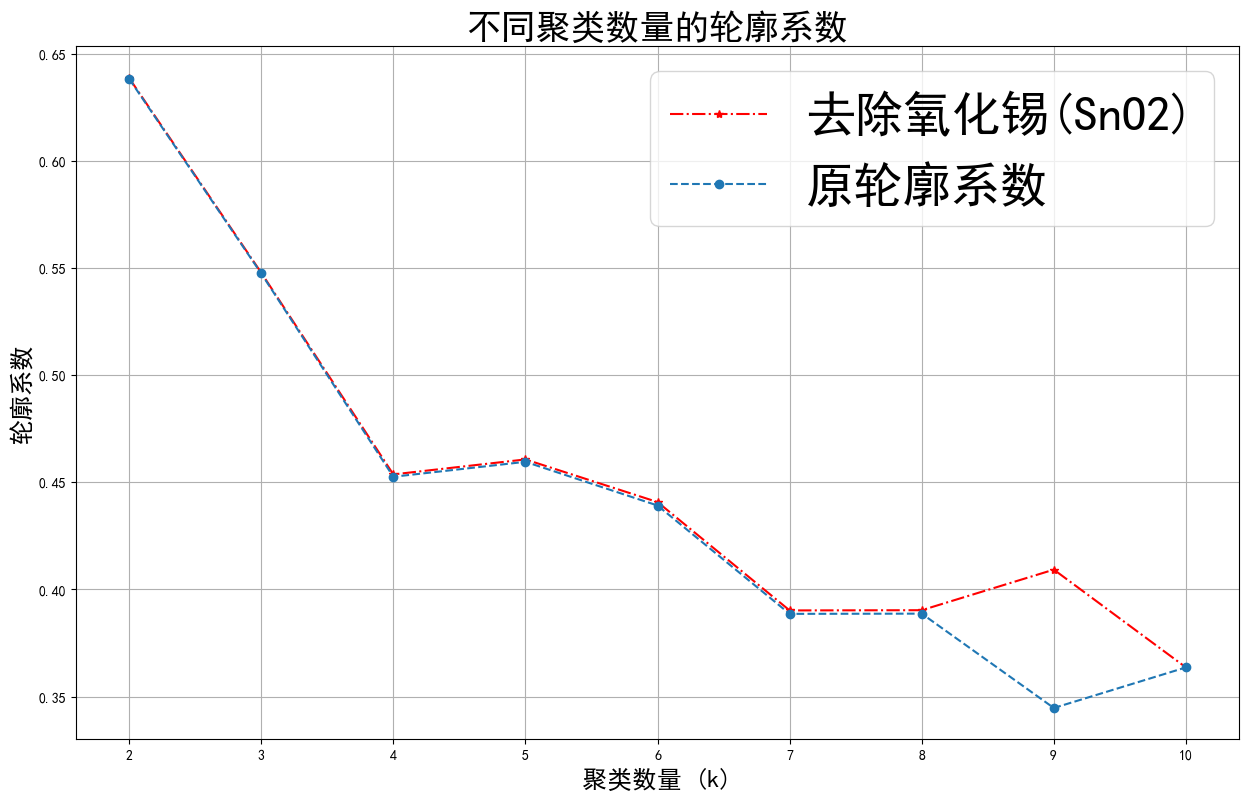

[[ 8.         10.          0.88870693  2.        ]
 [18.         19.          1.79390635  2.        ]
 [ 9.         20.          2.75142387  3.        ]
 [ 7.         21.          2.95120879  3.        ]
 [13.         15.          3.94010152  2.        ]
 [ 2.          4.          4.73394128  2.        ]
 [ 0.          3.          4.74594564  2.        ]
 [12.         14.          5.09877436  2.        ]
 [22.         23.          5.79622291  6.        ]
 [11.         25.          5.85724053  3.        ]
 [27.         29.          9.36782116  5.        ]
 [ 1.         16.          9.46770828  2.        ]
 [ 5.          6.         10.28721537  2.        ]
 [26.         30.         11.53657241  7.        ]
 [17.         31.         13.53948177  3.        ]
 [32.         33.         15.76772553  9.        ]
 [24.         35.         18.68672202 11.        ]
 [28.         34.         27.9937751   9.        ]
 [36.         37.         88.95659633 20.        ]]
For n_clusters=2, the Silhouet

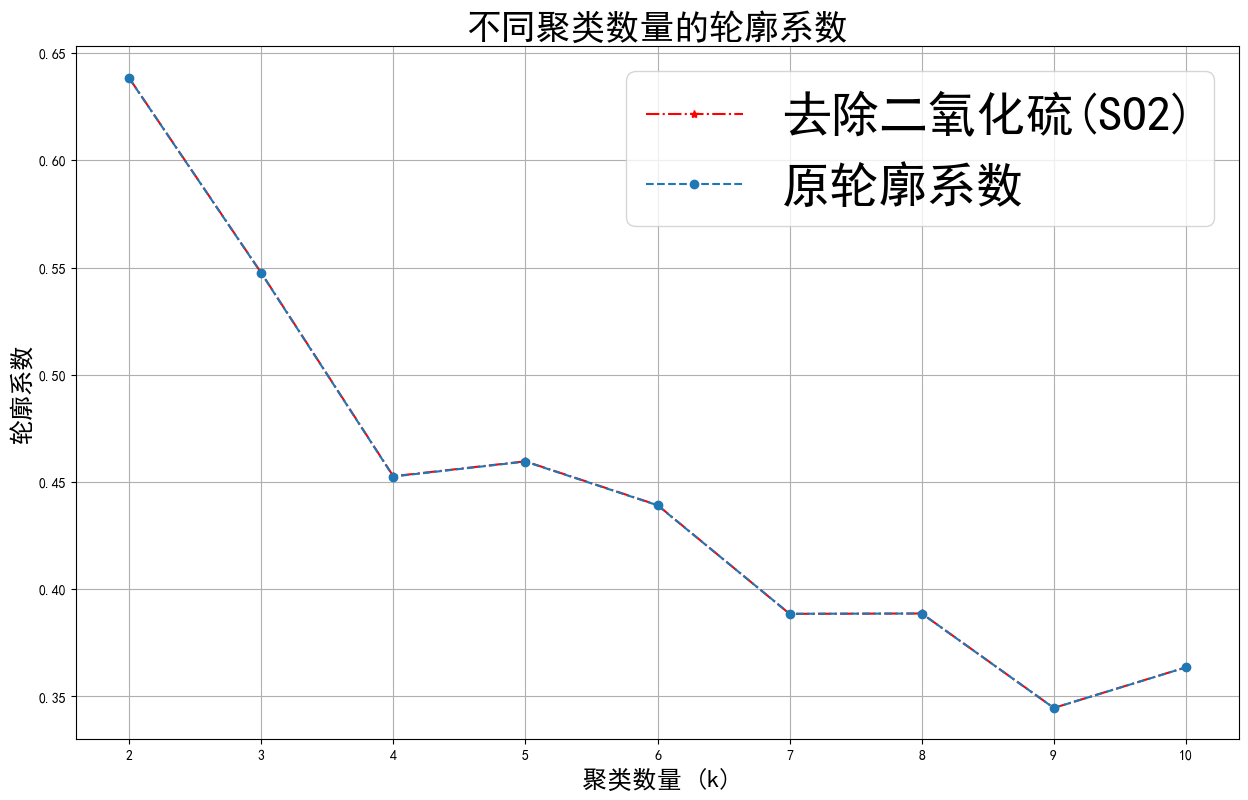

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.90492685   2.        ]
 [ 26.          27.           2.93453574   2.        ]
 [ 13.          14.           3.71546767   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [ 11.          16.           4.32436122   2.        ]
 [  4.          48.           4.3364271    2.        ]
 [ 18.          22.           4.40001136   2.        ]
 [ 12.          30.           5.37804797   2.        ]
 [  2.          10.           5.83915234   2.        ]
 [ 25.          37.           5.90167773   2.        ]
 [ 19.          54.           6.17988403   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.33513746   3.        ]
 [ 15.          60.           7.20807764   4.        ]
 [ 39.          55.           7.65064267   3.        ]
 [ 32.          36.           8.12221029   2.        ]
 [ 21.          53.           8.1704651    3.        ]
 [ 29.    

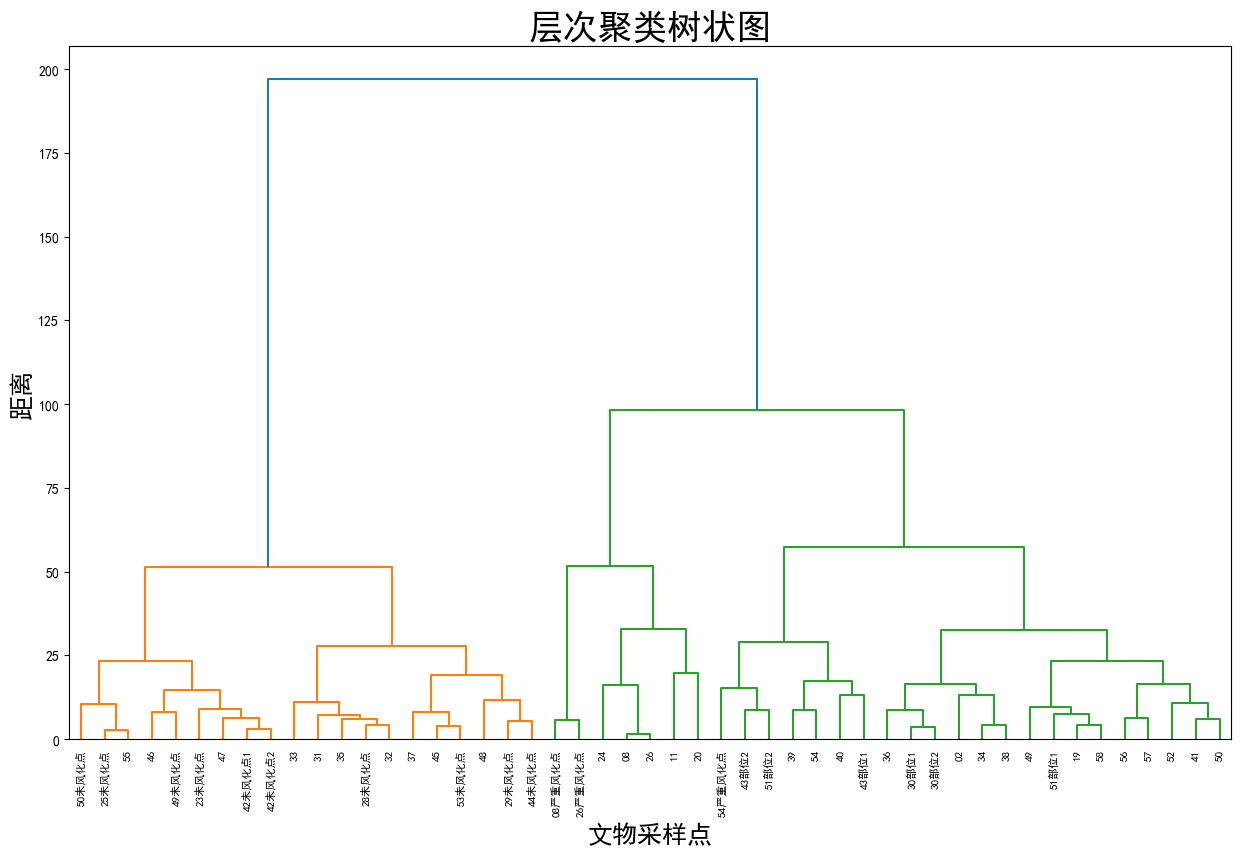

For n_clusters=2, the Silhouette Score is 0.5015844093616336
For n_clusters=3, the Silhouette Score is 0.510976667859331
For n_clusters=4, the Silhouette Score is 0.41164995208617045
For n_clusters=5, the Silhouette Score is 0.4342999380468402
For n_clusters=6, the Silhouette Score is 0.3568985092562978
For n_clusters=7, the Silhouette Score is 0.3725480627306039
For n_clusters=8, the Silhouette Score is 0.3336515055057883
For n_clusters=9, the Silhouette Score is 0.33451158720635926
For n_clusters=10, the Silhouette Score is 0.3181372903163838


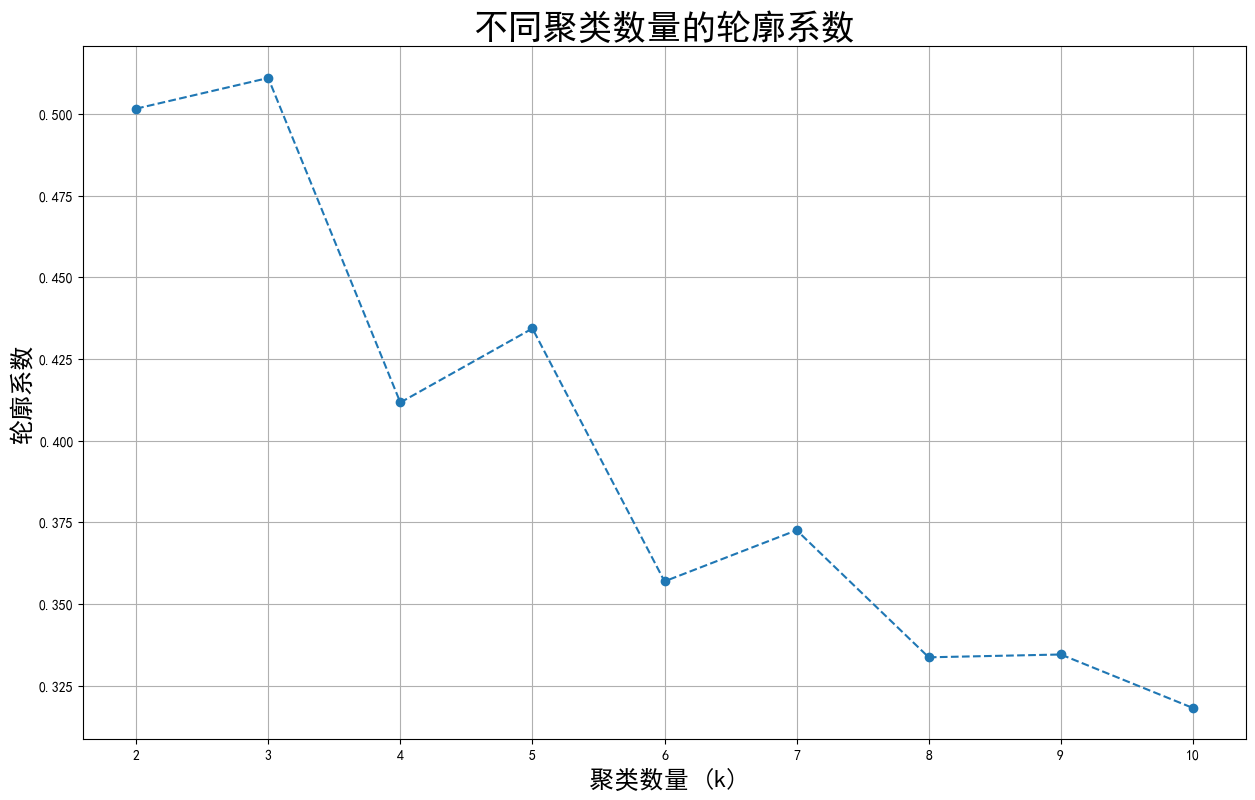

[[  1.           9.           1.67394743   2.        ]
 [  8.          45.           2.42458244   2.        ]
 [ 13.          14.           2.66394444   2.        ]
 [ 16.          19.           2.74497723   2.        ]
 [ 11.          17.           2.88239484   2.        ]
 [ 26.          27.           2.93370073   2.        ]
 [ 39.          48.           3.1542194    2.        ]
 [ 31.          42.           3.27766685   2.        ]
 [ 18.          22.           3.35225297   2.        ]
 [ 30.          34.           4.56447149   2.        ]
 [ 46.          47.           4.99523773   2.        ]
 [ 32.          33.           5.2443112    2.        ]
 [  4.          55.           5.27951702   3.        ]
 [ 15.          53.           5.30671901   3.        ]
 [  2.          10.           5.77092714   2.        ]
 [ 25.          37.           5.88212547   2.        ]
 [ 12.          58.           6.03866431   3.        ]
 [ 41.          64.           6.5866886    3.        ]
 [  6.    

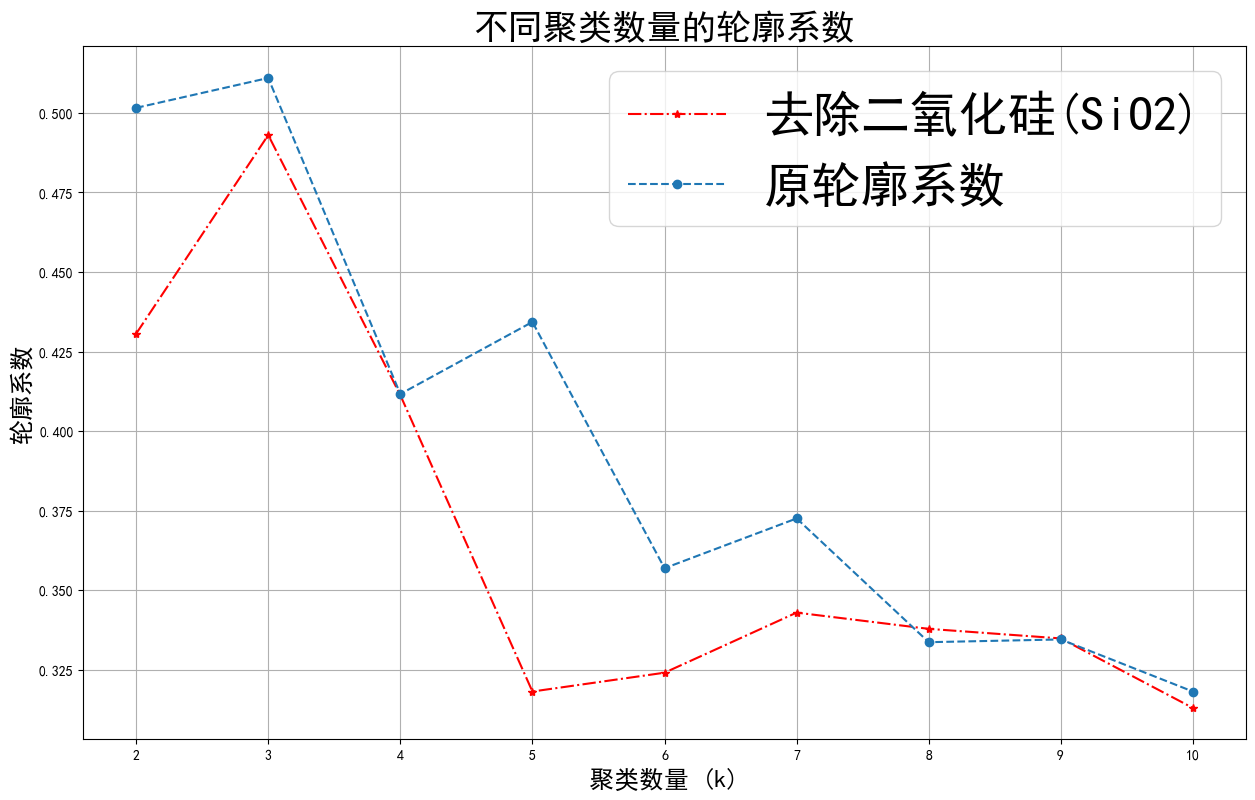

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.87725564   2.        ]
 [ 26.          27.           2.93392229   2.        ]
 [ 13.          14.           3.71546767   2.        ]
 [ 31.          42.           4.0327534    2.        ]
 [ 18.          22.           4.17800191   2.        ]
 [ 11.          16.           4.32436122   2.        ]
 [  4.          48.           4.3364271    2.        ]
 [ 32.          33.           4.3881773    2.        ]
 [ 12.          30.           4.93394366   2.        ]
 [  2.          10.           5.83915234   2.        ]
 [ 25.          37.           5.90167773   2.        ]
 [ 19.          55.           6.17988403   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [  6.          51.           6.75560755   3.        ]
 [ 15.          61.           7.20807764   4.        ]
 [ 21.          53.           7.47840224   3.        ]
 [ 39.          56.           7.65064267   3.        ]
 [ 20.    

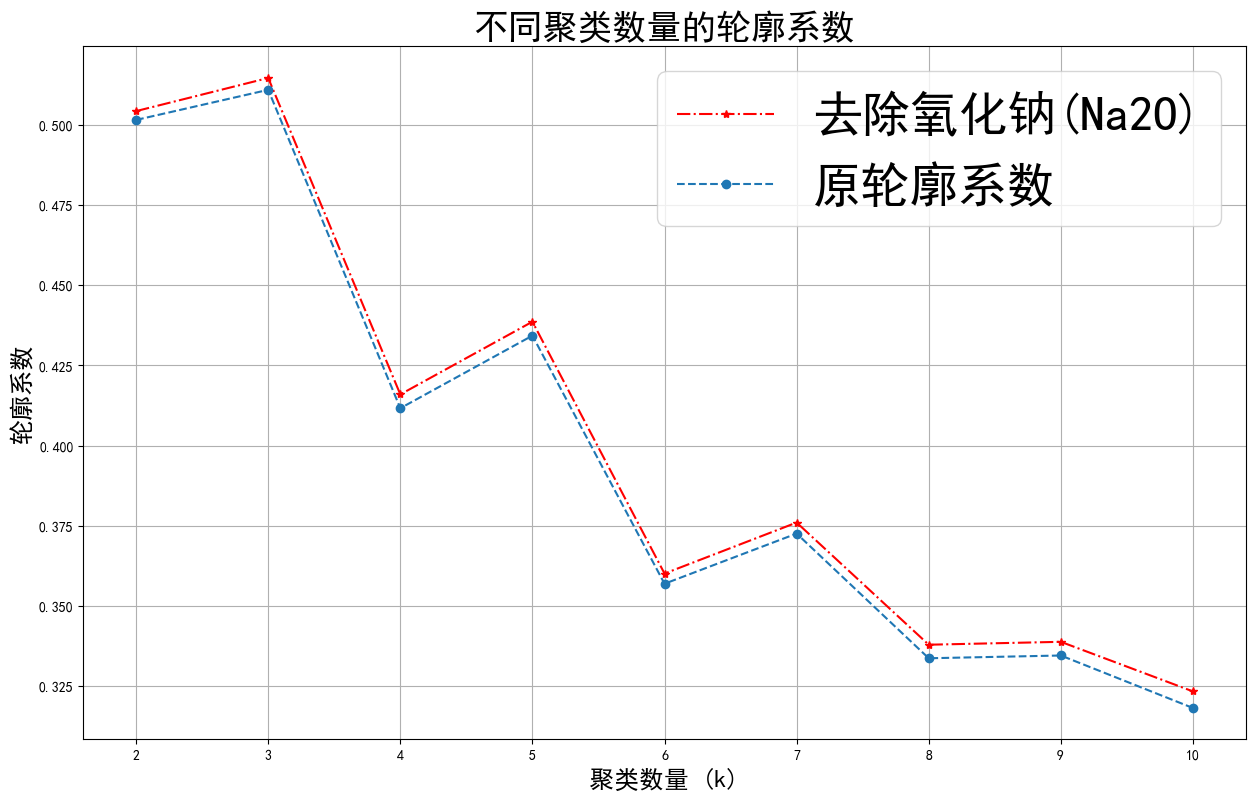

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.90492685   2.        ]
 [ 26.          27.           2.92771242   2.        ]
 [ 13.          14.           3.43752818   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [  4.          48.           4.32307761   2.        ]
 [ 11.          16.           4.32407215   2.        ]
 [ 18.          22.           4.39290337   2.        ]
 [ 12.          30.           5.37711819   2.        ]
 [  2.          10.           5.82543561   2.        ]
 [ 25.          37.           5.88525276   2.        ]
 [ 19.          55.           6.17392366   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.33496909   3.        ]
 [ 15.          60.           7.20552334   4.        ]
 [ 39.          54.           7.64812395   3.        ]
 [ 32.          36.           8.12205639   2.        ]
 [ 21.          53.           8.16929005   3.        ]
 [ 29.    

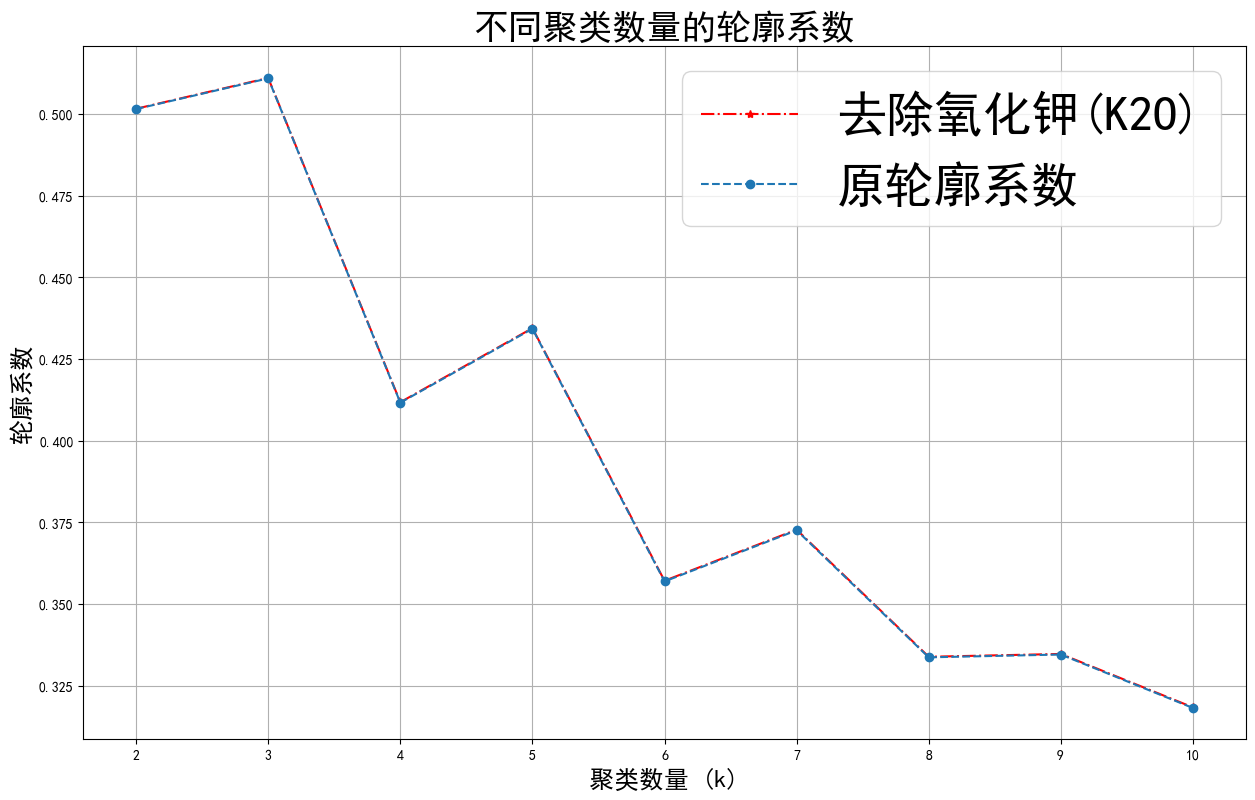

[[  1.           9.           1.70967833   2.        ]
 [ 26.          27.           2.82619886   2.        ]
 [  8.          45.           2.86157299   2.        ]
 [ 13.          14.           3.70704734   2.        ]
 [ 31.          42.           4.05017284   2.        ]
 [ 11.          16.           4.23387529   2.        ]
 [  4.          48.           4.30011628   2.        ]
 [ 18.          22.           4.39887486   2.        ]
 [ 12.          30.           5.31204292   2.        ]
 [ 25.          37.           5.63         2.        ]
 [  2.          10.           5.8363773    2.        ]
 [ 19.          54.           6.15064495   3.        ]
 [ 46.          47.           6.23340196   2.        ]
 [ 33.          50.           6.31134957   3.        ]
 [ 15.          60.           7.12827586   4.        ]
 [ 20.          52.           7.58516535   3.        ]
 [ 39.          55.           7.63870408   3.        ]
 [ 32.          36.           7.85136294   2.        ]
 [ 21.    

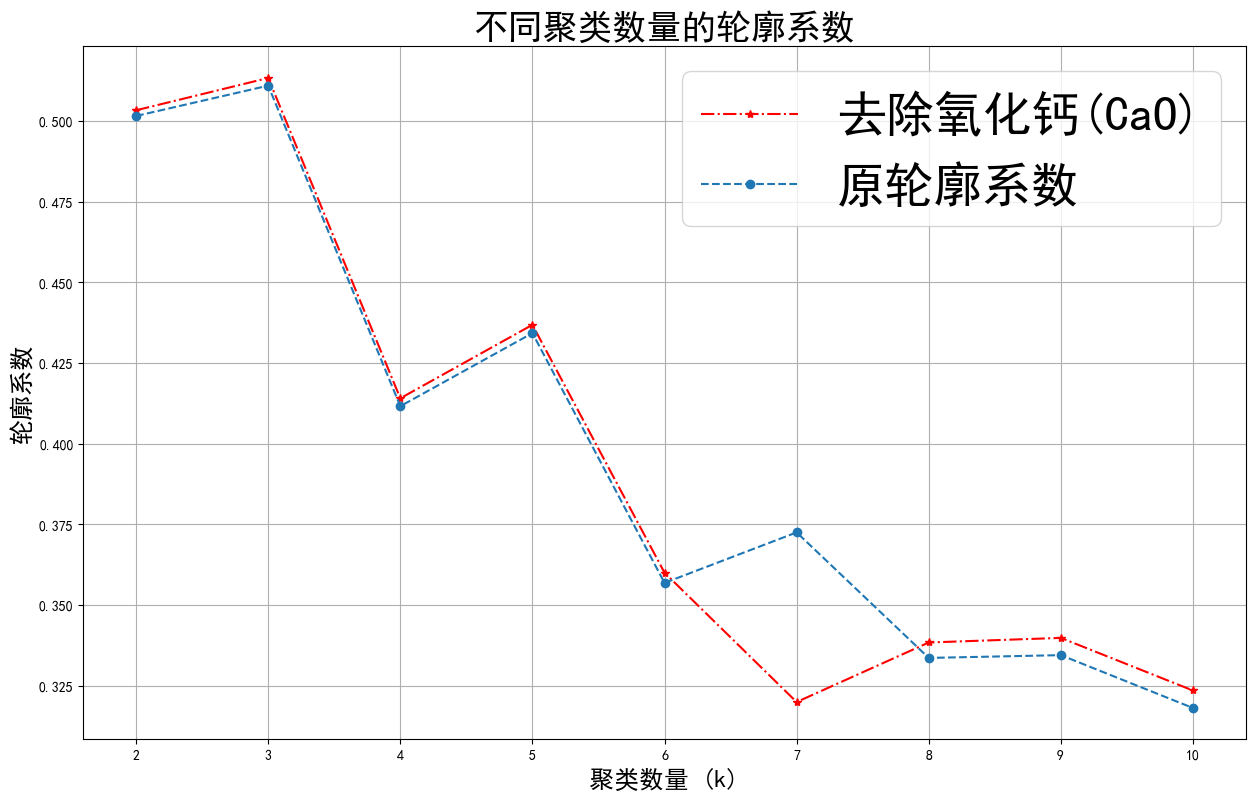

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.90492685   2.        ]
 [ 26.          27.           2.93370073   2.        ]
 [ 13.          14.           3.68562071   2.        ]
 [ 31.          42.           4.03081878   2.        ]
 [ 11.          16.           4.20714868   2.        ]
 [  4.          48.           4.33181255   2.        ]
 [ 18.          22.           4.40001136   2.        ]
 [ 12.          30.           5.16752358   2.        ]
 [ 25.          37.           5.45180704   2.        ]
 [  2.          10.           5.83915234   2.        ]
 [ 19.          54.           6.15285571   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.30716524   3.        ]
 [ 15.          60.           7.17576244   4.        ]
 [ 39.          55.           7.62882691   3.        ]
 [ 21.          53.           8.09804709   3.        ]
 [ 32.          36.           8.10860037   2.        ]
 [ 23.    

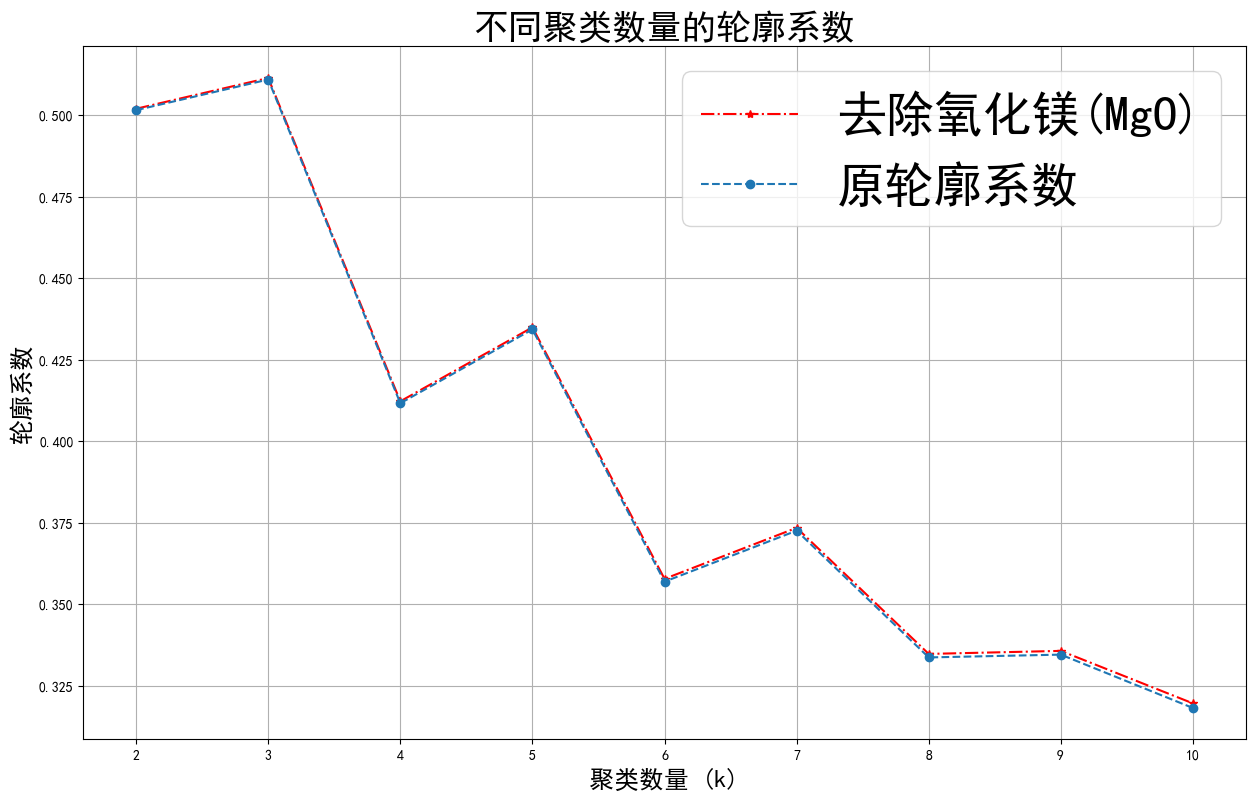

[[  1.           9.           1.58587515   2.        ]
 [ 26.          27.           2.01856385   2.        ]
 [  8.          45.           2.86986062   2.        ]
 [ 11.          16.           3.63655056   2.        ]
 [ 13.          14.           3.68301507   2.        ]
 [ 31.          42.           3.90946288   2.        ]
 [ 18.          22.           4.29623091   2.        ]
 [  4.          48.           4.33613884   2.        ]
 [ 12.          30.           5.11868147   2.        ]
 [ 19.          52.           5.68918565   3.        ]
 [ 25.          37.           5.71823399   2.        ]
 [  2.          10.           5.83873274   2.        ]
 [ 33.          50.           6.0821323    3.        ]
 [ 46.          47.           6.22546384   2.        ]
 [ 15.          58.           7.2001088    4.        ]
 [ 39.          56.           7.39298992   3.        ]
 [ 21.          54.           7.49855764   3.        ]
 [ 23.          43.           7.90235408   2.        ]
 [ 32.    

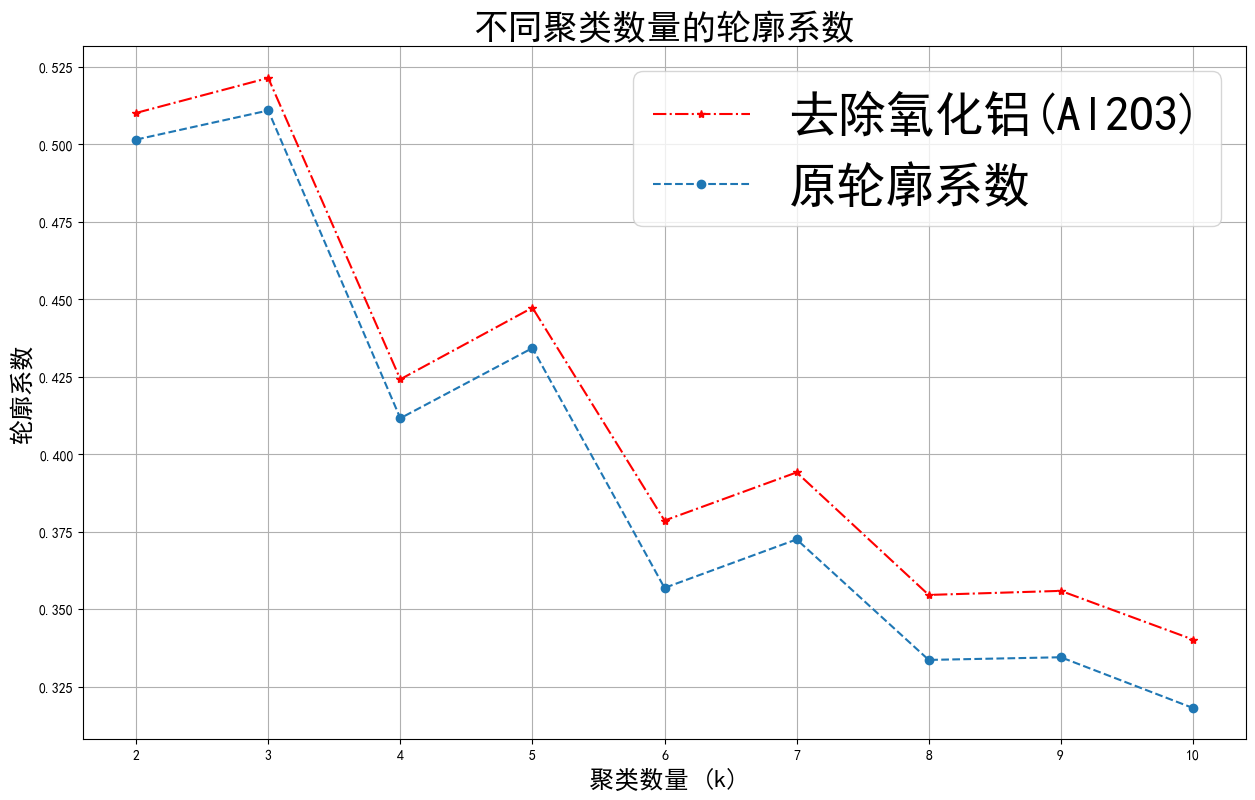

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.45684757   2.        ]
 [ 11.          15.           2.9241409    2.        ]
 [ 26.          27.           2.93453574   2.        ]
 [ 13.          14.           3.66337276   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [  4.          48.           4.31088158   2.        ]
 [ 18.          22.           4.39632801   2.        ]
 [ 16.          19.           4.61367532   2.        ]
 [ 12.          30.           5.37789922   2.        ]
 [ 25.          37.           5.71823399   2.        ]
 [  2.          10.           5.83915234   2.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          52.           6.33513746   3.        ]
 [ 51.          57.           7.31540156   4.        ]
 [ 39.          55.           7.64985621   3.        ]
 [ 32.          36.           8.0223064    2.        ]
 [ 21.          54.           8.1704651    3.        ]
 [ 20.    

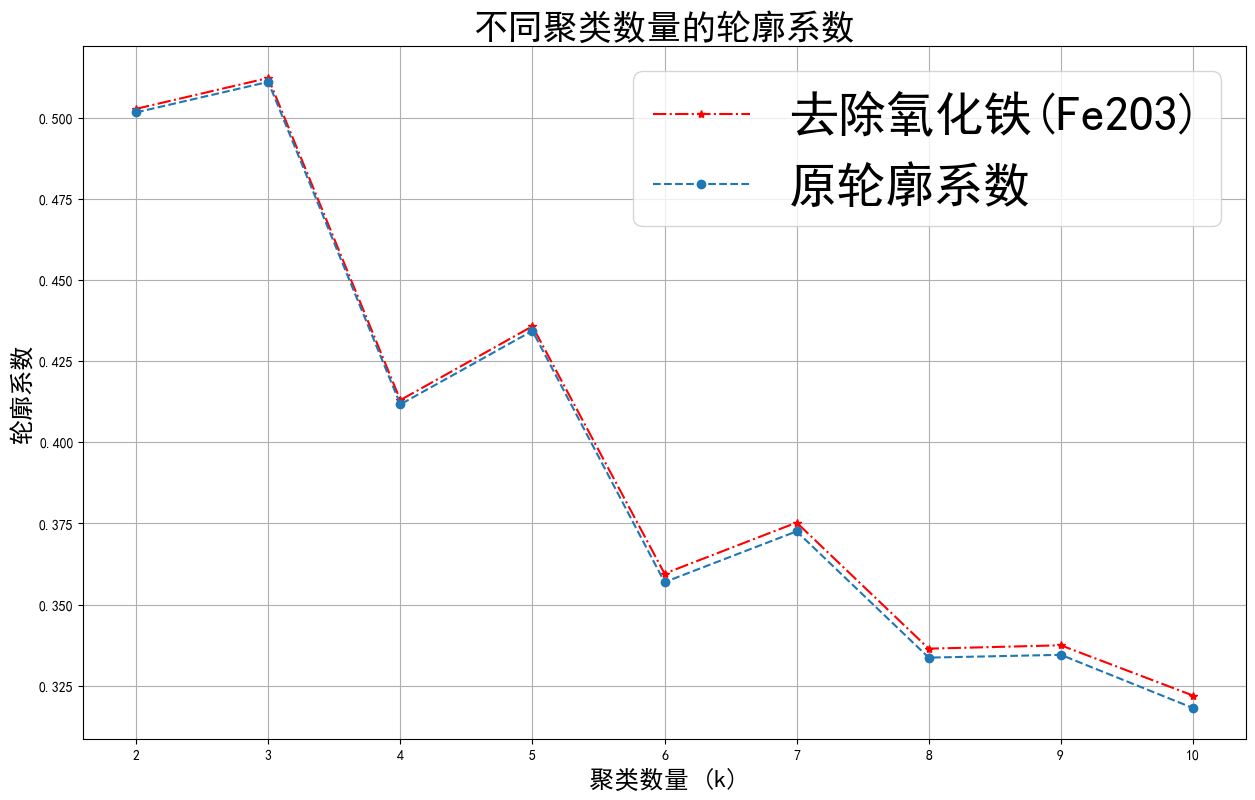

[[  1.           9.           1.702645     2.        ]
 [  8.          45.           2.89326805   2.        ]
 [ 26.          27.           2.93410975   2.        ]
 [ 13.          14.           3.71546767   2.        ]
 [ 31.          42.           4.05060489   2.        ]
 [ 11.          16.           4.3187614    2.        ]
 [  4.          48.           4.31974536   2.        ]
 [ 18.          22.           4.33032331   2.        ]
 [ 12.          30.           5.36910607   2.        ]
 [  2.          10.           5.82100507   2.        ]
 [ 25.          37.           5.82633676   2.        ]
 [ 33.          51.           5.87859961   3.        ]
 [ 19.          54.           6.17949566   3.        ]
 [ 46.          47.           6.2232146    2.        ]
 [ 15.          61.           7.20208187   4.        ]
 [ 39.          55.           7.31179413   3.        ]
 [ 21.          53.           7.65434517   3.        ]
 [ 32.          36.           8.11590414   2.        ]
 [ 29.    

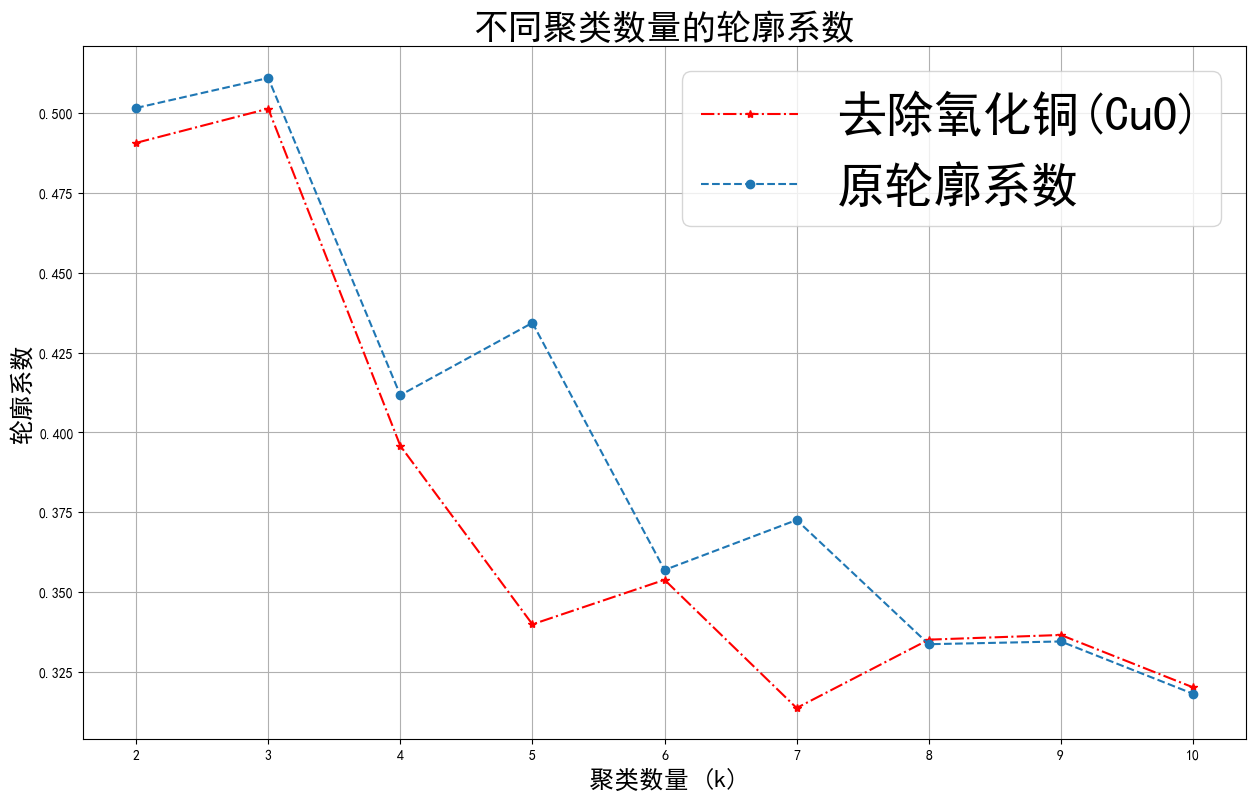

[[  1.           9.           1.48394744   2.        ]
 [ 26.          27.           2.3481695    2.        ]
 [  4.          48.           2.60071144   2.        ]
 [  8.          45.           2.71996324   2.        ]
 [ 31.          42.           3.31339705   2.        ]
 [ 13.          14.           3.40797594   2.        ]
 [ 18.          22.           3.42673314   2.        ]
 [ 11.          16.           3.44030522   2.        ]
 [ 33.          50.           3.78426127   3.        ]
 [ 19.          56.           4.57285104   3.        ]
 [ 46.          47.           4.9033458    2.        ]
 [ 23.          41.           5.16384547   2.        ]
 [ 12.          30.           5.21856302   2.        ]
 [ 39.          43.           5.25164736   2.        ]
 [  2.          10.           5.26258492   2.        ]
 [ 35.          51.           5.41265492   3.        ]
 [ 29.          40.           5.63992908   2.        ]
 [ 25.          37.           5.90045761   2.        ]
 [  6.    

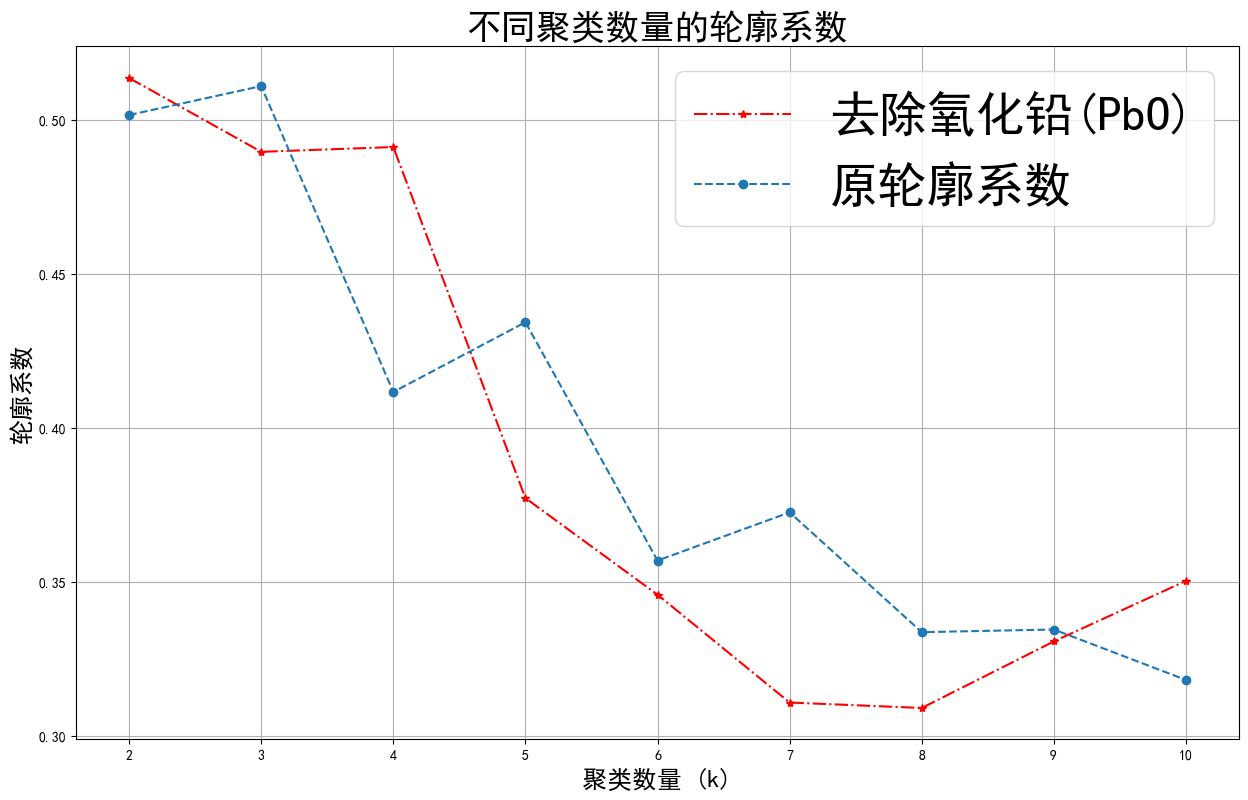

[[  1.           9.           1.37266165   2.        ]
 [  8.          45.           2.59780677   2.        ]
 [ 26.          27.           2.90575291   2.        ]
 [  2.          10.           3.28128024   2.        ]
 [ 31.          42.           3.53929371   2.        ]
 [  4.          48.           3.6699455    2.        ]
 [ 13.          14.           3.71498318   2.        ]
 [ 25.          37.           3.88795576   2.        ]
 [ 11.          16.           4.24199246   2.        ]
 [ 12.          30.           4.32981524   2.        ]
 [ 18.          22.           4.39499716   2.        ]
 [ 32.          36.           5.61367972   2.        ]
 [ 46.          47.           5.95338559   2.        ]
 [ 19.          57.           6.01717819   3.        ]
 [ 33.          51.           6.11145918   3.        ]
 [ 40.          43.           6.76173794   2.        ]
 [  0.          59.           6.87180714   3.        ]
 [ 15.          62.           6.98692469   4.        ]
 [ 39.    

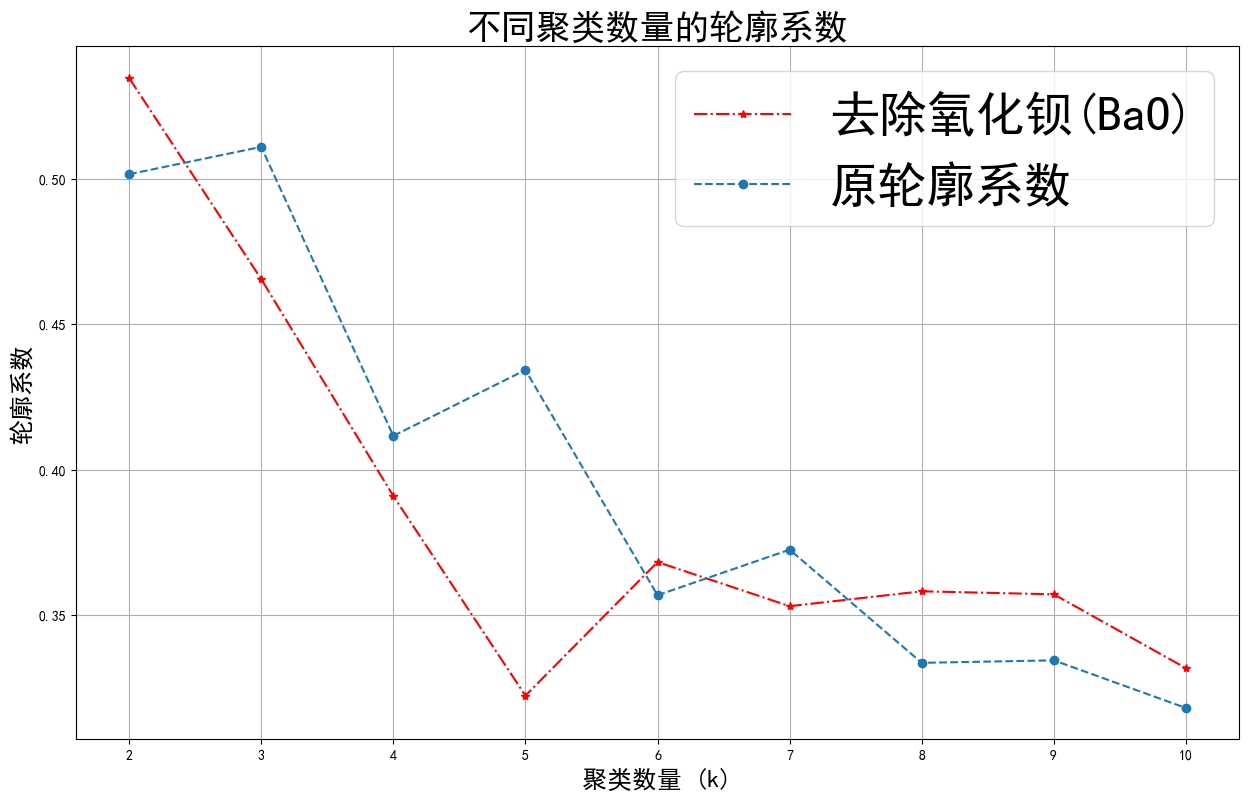

[[  1.           9.           1.6471187    2.        ]
 [  8.          45.           2.9005172    2.        ]
 [ 26.          27.           2.93344507   2.        ]
 [ 13.          14.           3.43752818   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [ 11.          16.           4.23594145   2.        ]
 [  4.          48.           4.33347436   2.        ]
 [ 18.          22.           4.39778353   2.        ]
 [ 12.          30.           5.36239685   2.        ]
 [  2.          10.           5.63784533   2.        ]
 [ 46.          47.           5.69330308   2.        ]
 [ 25.          37.           5.79442836   2.        ]
 [ 19.          54.           6.17619084   3.        ]
 [ 33.          51.           6.33475861   3.        ]
 [ 32.          36.           6.99970714   2.        ]
 [ 15.          61.           7.0864354    4.        ]
 [ 39.          55.           7.59325578   3.        ]
 [ 29.          40.           7.65444315   2.        ]
 [ 38.    

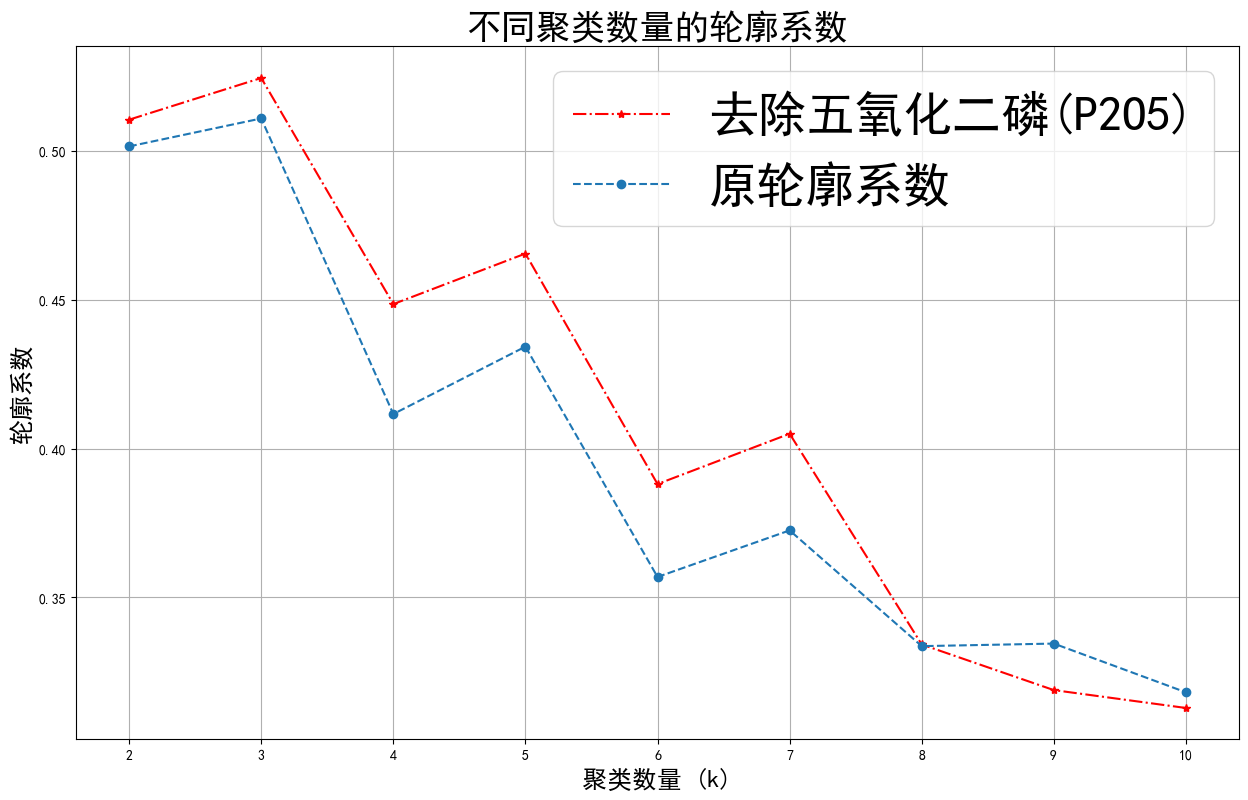

[[  1.           9.           1.70827398   2.        ]
 [  8.          45.           2.89803382   2.        ]
 [ 26.          27.           2.91358885   2.        ]
 [ 13.          14.           3.7131927    2.        ]
 [ 31.          42.           4.05041973   2.        ]
 [ 11.          16.           4.32269592   2.        ]
 [  4.          48.           4.33613884   2.        ]
 [ 18.          22.           4.39590719   2.        ]
 [ 12.          30.           5.37803868   2.        ]
 [  2.          10.           5.8384587    2.        ]
 [ 25.          37.           5.89861848   2.        ]
 [ 19.          54.           6.17949566   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.28700777   3.        ]
 [ 15.          60.           7.20104043   4.        ]
 [ 39.          55.           7.64797359   3.        ]
 [ 32.          36.           8.12116987   2.        ]
 [ 21.          53.           8.17017136   3.        ]
 [ 29.    

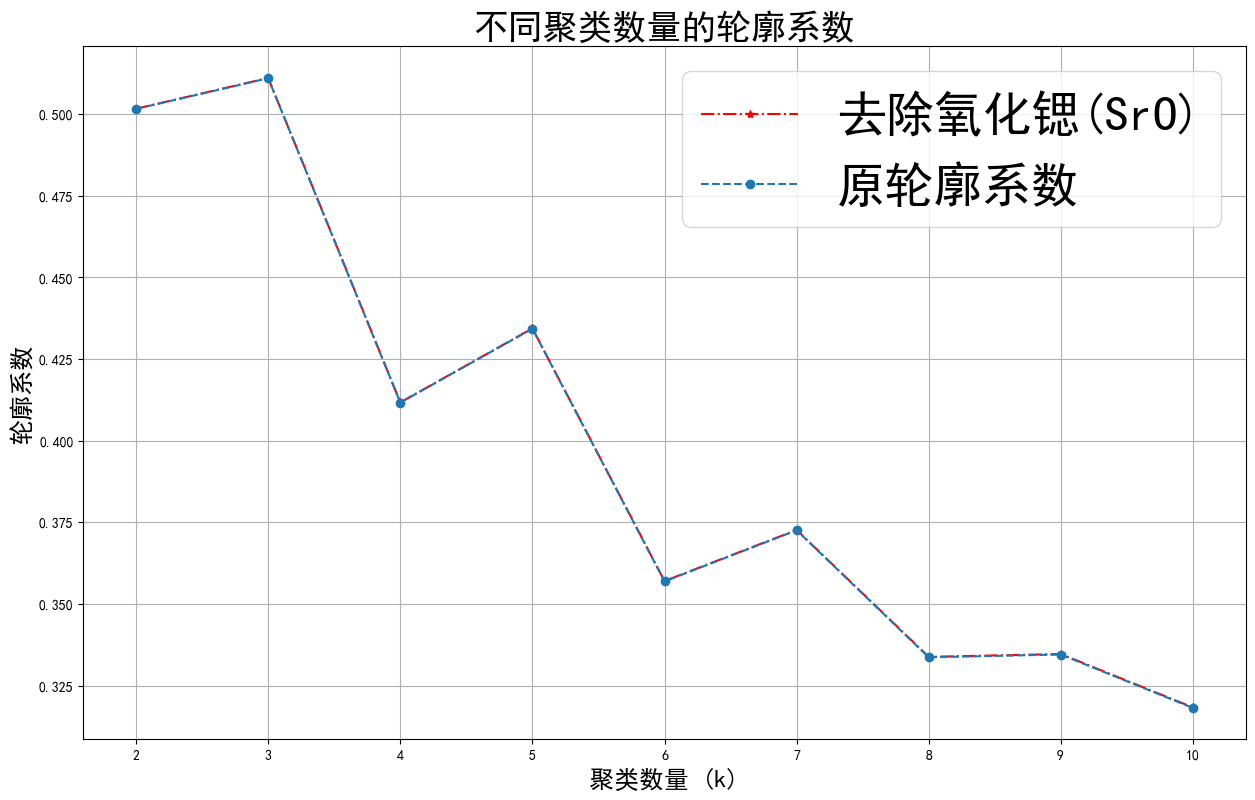

[[  1.           9.           1.71014619   2.        ]
 [  8.          45.           2.90492685   2.        ]
 [ 26.          27.           2.93453574   2.        ]
 [ 13.          14.           3.71525235   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [ 11.          16.           4.31824038   2.        ]
 [  4.          48.           4.3364271    2.        ]
 [ 18.          22.           4.40001136   2.        ]
 [ 12.          30.           5.37804797   2.        ]
 [  2.          10.           5.83915234   2.        ]
 [ 25.          37.           5.90167773   2.        ]
 [ 19.          54.           6.1784572    3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.33513746   3.        ]
 [ 15.          60.           7.20746604   4.        ]
 [ 39.          55.           7.63136947   3.        ]
 [ 32.          36.           8.12221029   2.        ]
 [ 21.          53.           8.1704651    3.        ]
 [ 29.    

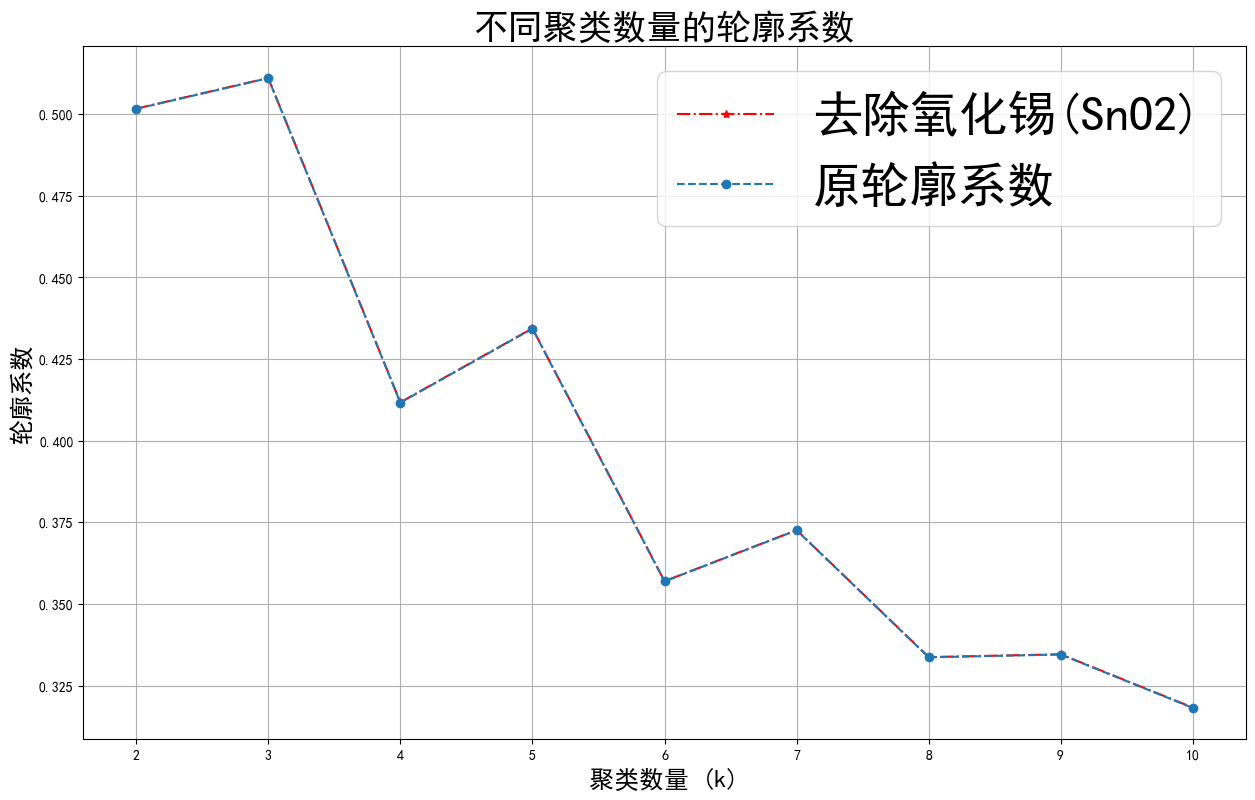

[[  1.           9.           1.59380049   2.        ]
 [  8.          45.           2.90492685   2.        ]
 [ 26.          27.           2.93453574   2.        ]
 [ 13.          14.           3.71546767   2.        ]
 [ 31.          42.           4.05061724   2.        ]
 [ 11.          16.           4.32436122   2.        ]
 [  4.          48.           4.3364271    2.        ]
 [ 18.          22.           4.40001136   2.        ]
 [ 12.          30.           5.37804797   2.        ]
 [  2.          10.           5.7662206    2.        ]
 [ 25.          37.           5.90167773   2.        ]
 [ 19.          54.           6.17988403   3.        ]
 [ 46.          47.           6.23420404   2.        ]
 [ 33.          51.           6.33513746   3.        ]
 [ 21.          53.           6.99254603   3.        ]
 [ 15.          60.           7.20807764   4.        ]
 [ 39.          55.           7.65064267   3.        ]
 [ 32.          36.           8.12221029   2.        ]
 [ 29.    

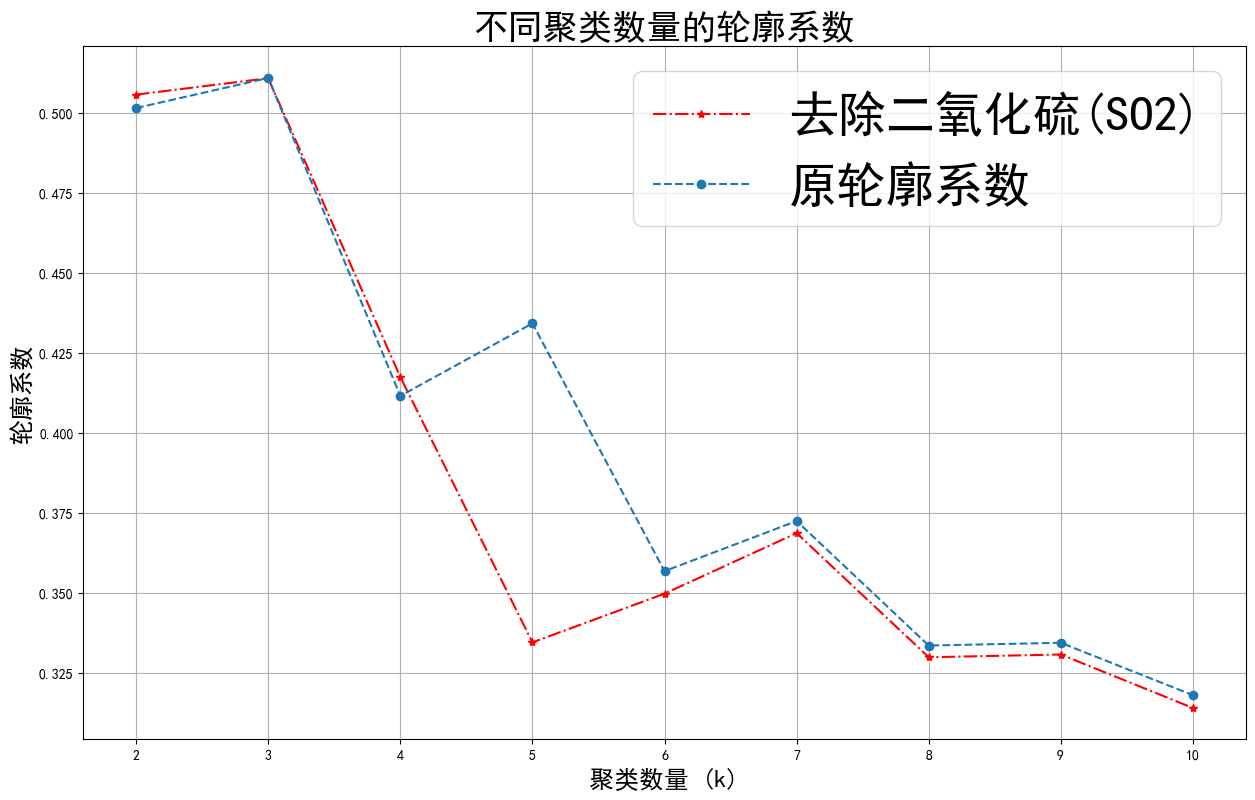

In [11]:
def Hierarchical_Clustering(data,sample_labels):
    # 层次聚类
    z = linkage(data, "ward", metric='euclidean')
    # 类间距离为最短距离，距离计算使用欧式距离
    print(z)  # 聚类过程

    # 画聚类图
    fig, ax = plt.subplots(figsize=(15, 9))  # 图片尺寸
    dendrogram(z ,labels=sample_labels, ax=ax, orientation='top')
    plt.title("层次聚类树状图", fontsize=25)
    plt.xlabel("文物采样点", fontsize=18)
    plt.ylabel("距离", fontsize=18)
    plt.show()

    # 计算不同k值下的Silhouette Score
    silhouette_scores = []
    for k in range(2, 11):  # 从2到10尝试不同的k值
        cluster_labels = AgglomerativeClustering(n_clusters=k).fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters={k}, the Silhouette Score is {silhouette_avg}")

    # 绘制Silhouette Score的曲线
    plt.figure(figsize=(15, 9))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel("聚类数量 (k)", fontsize=18)
    plt.ylabel("轮廓系数", fontsize=18)
    plt.title("不同聚类数量的轮廓系数", fontsize=25)
    plt.grid(True)
    plt.show()

    # 敏感性分析
    for i in range(0,14):
        data1 = data.drop(data.columns[i], axis=1)
        # 层次聚类
        z = linkage(data1, "ward", metric='euclidean')
        # 类间距离为最短距离，距离计算使用欧式距离
        print(z)  # 聚类过程

        # 计算不同k值下的Silhouette Score
        K_silhouette_scores = []
        for k in range(2, 11):  # 从2到10尝试不同的k值
            cluster_labels = AgglomerativeClustering(n_clusters=k).fit_predict(data1)
            silhouette_avg = silhouette_score(data1, cluster_labels)
            K_silhouette_scores.append(silhouette_avg)
            print(f"For n_clusters={k}, the Silhouette Score is {silhouette_avg}")
        label= f"去除{data.columns[i]}"
        # 绘制Silhouette Score的曲线
        plt.figure(figsize=(15, 9))
        plt.plot(range(2, 11), K_silhouette_scores, marker='*', linestyle='-.',c='r',label=label)
        plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--',label='原轮廓系数')
        plt.legend(loc='upper right', fontsize=35)
        plt.xlabel("聚类数量 (k)", fontsize=18)
        plt.ylabel("轮廓系数", fontsize=18)
        plt.title("不同聚类数量的轮廓系数", fontsize=25)
        plt.grid(True)
        plt.show()

if __name__ == '__main__':
    Hierarchical_Clustering(df1,sample_label1)
    Hierarchical_Clustering(df2,sample_label2)
